# The Math of Intelligence (Week 1) - Support Vector Machine Classification


## What will we do?

We will build a Support Vector Machine that will find the optimal hyperplane that maximizes the margin between two toy data classes using gradient descent.  

![alt text](http://opticalengineering.spiedigitallibrary.org/data/journals/optice/24850/oe_52_2_027003_f005.png "Logo Title Text 1")


## What are some use cases for SVMs?

-Classification, regression (time series prediction, etc) , outlier detection, clustering

## Other Examples

- Learning to use Scikit-learn's SVM function to classify images https://github.com/ksopyla/svm_mnist_digit_classification
- Pulse classification, more useful dataset 
https://github.com/akasantony/pulse-classification-svm

## How does an SVM compare to other ML algorithms?

![alt text](https://image.slidesharecdn.com/mscpresentation-140722065852-phpapp01/95/msc-presentation-bioinformatics-7-638.jpg?cb=1406012610 "Logo Title Text 1")

- As a rule of thumb, SVMs are great for relatively small data sets with fewer outliers. 
- Other algorithms (Random forests, deep neural networks, etc.) require more data but almost always come up with very robust models.
- The decision of which classifier to use depends on your dataset and the general complexity of the problem.
- "Premature optimization is the root of all evil (or at least most of it) in programming." - Donald Knuth, CS Professor (Turing award speech 1974)  


## What is a Support Vector Machine?

It's a supervised machine learning algorithm which can be used for both classification or regression problems. But it's usually used for classification. Given 2 or more labeled classes of data, it acts as a discriminative classifier, formally defined by an optimal hyperplane that seperates all the classes. New examples that are then mapped into that same space can then be categorized based on on which side of the gap they fall.

## What are Support Vectors?

![alt text](https://www.dtreg.com/uploaded/pageimg/SvmMargin2.jpg "Logo Title Text 1")
 
Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set, they are what help us build our SVM. 

## Whats a hyperplane?

![alt text](http://slideplayer.com/slide/1579281/5/images/32/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")

Geometry tells us that a hyperplane is a subspace of one dimension less than its ambient space. For instance, a hyperplane of an n-dimensional space is a flat subset with dimension n − 1. By its nature, it separates the space into two half spaces.

## Linear vs nonlinear classification?

Sometimes our data is linearly seperable. That means for N classes with M features, we can learn a mapping that is a linear combination. (like y = mx + b). Or even a multidimensional hyperplane (y = x + z + b + q). No matter how many dimensions/features a set of classes have, we can represent the mapping using a linear function.

But sometimes its not. Like if there was a quadratic mapping. Luckily for us SVMs can can efficiently perform a non-linear classification using what is called the kernel trick. I'll talk about that lter on in the course. 

![alt text](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAuSAAAAJDlhYzcwMzhlLTA0MjYtNDEyYS1hMWM4LTE3Zjk5NDlhNzVkMQ.png "Logo Title Text 1")

Alright let's get to building!

-1
-1


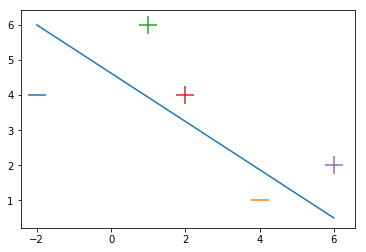

In [1]:
#To help us perform math operations
import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline

#Step 1 - Define our data

#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        print(sample[2])
        plt.scatter(sample[0], sample[1], s=300, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=300, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

## Let's define our loss function (what to minimize) and our objective function (what to optimize)

#### Loss function

We'll use the Hinge loss. This is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).

![alt text](http://i.imgur.com/OzCwzyN.png "Logo Title Text 1")


c is the loss function, x the sample, y is the true label, f(x) the predicted label.

![alt text](http://i.imgur.com/FZ7JcG3.png "Logo Title Text 1")

 
#### Objective Function

![alt text](http://i.imgur.com/I5NNu44.png "Logo Title Text 1")

As you can see, our objective of a SVM consists of two terms. The first term is a regularizer, the heart of the SVM, the second term the loss. The regularizer balances between margin maximization and loss. We want to find the decision surface that is maximally far away from any data points.

How do we minimize our loss/optimize for our objective (i.e learn)?

We have to derive our objective function to get the gradients! Gradient descent ftw.  As we have two terms, we will derive them seperately using the sum rule in differentiation.


![alt text](http://i.imgur.com/6uK3BnH.png "Logo Title Text 1")

This means, if we have a misclassified sample, we update the weight vector w using the gradients of both terms, else if classified correctly,we just update w by the gradient of the regularizer.



Misclassification condition 

![alt text](http://i.imgur.com/g9QLAyn.png "Logo Title Text 1")

Update rule for our weights (misclassified)

![alt text](http://i.imgur.com/rkdPpTZ.png "Logo Title Text 1")

including the learning rate η and the regularizer λ
The learning rate is the length of the steps the algorithm makes down the gradient on the error curve.
- Learning rate too high? The algorithm might overshoot the optimal point.
- Learning rate too low? Could take too long to converge. Or never converge.

The regularizer controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data. As a regulizing parameter we choose 1/epochs, so this parameter will decrease, as the number of epochs increases.
- Regularizer too high? overfit (large testing error) 
- Regularizer too low? underfit (large training error) 

Update rule for our weights (correctly classified)

![alt text](http://i.imgur.com/xTKbvZ6.png "Logo Title Text 1")


初始weight:  [0. 0. 0.]
errors:  []
epoch:  1
[-2  4 -1]
[0. 0. 0.]
-0.0
-1
[ 2 -4  1]
w:  [  8. -16.   4.]
[ 4  1 -1]
[  8. -16.   4.]
-12.0
-1
[-4 -1  1]
w:  [-72. 108. -24.]
[ 1  6 -1]
[-72. 108. -24.]
600.0
[ 2  4 -1]
[ 504. -756.  168.]
-2184.0
1
[ 2  4 -1]
w:  [-3520.  5308. -1180.]
[ 6  2 -1]
[-3520.  5308. -1180.]
-9324.0
1
[ 6  2 -1]
w:  [ 24664. -37148.   8256.]
1
epoch:  2
[-2  4 -1]
[ 24664. -37148.   8256.]
206176.0
[ 4  1 -1]
[-73992. 111444. -24768.]
159756.0
[ 1  6 -1]
[ 221976. -334332.   74304.]
-1858320.0
1
[ 1  6 -1]
w:  [-665924. 1003020. -222916.]
[ 2  4 -1]
[-665924. 1003020. -222916.]
2903148.0
[ 6  2 -1]
[ 1997772. -3009060.   668748.]
5299764.0
1
epoch:  3
[-2  4 -1]
[-5993316.  9027180. -2006244.]
-50101596.0
-1
[ 2 -4  1]
w:  [  9988868. -15045316.   3343744.]
[ 4  1 -1]
[  9988868. -15045316.   3343744.]
-21566412.0
-1
[-4 -1  1]
w:  [-16648129.33333333  25075522.66666666  -5572902.66666667]
[ 1  6 -1]
[-16648129.33333333  25075522.66666666  -5572902.66666667

[-3.51237464 11.82748453  1.29905429]
1.281666947878282
1
epoch:  34
[-2  4 -1]
[-2.66088988  8.96021556  0.98413203]
-40.178509942476346
-1
[ 2 -4  1]
w:  [ 5.96520186 -9.14807046  4.75257156]
[ 4  1 -1]
[ 5.96520186 -9.14807046  4.75257156]
-9.960165418980544
-1
[-4 -1  1]
w:  [-11.43837505 -10.99558329   7.63431942]
[ 1  6 -1]
[-11.43837505 -10.99558329   7.63431942]
-85.0461942218358
1
[ 1  6 -1]
w:  [-4.74699269 15.59161278  1.83800897]
[ 2  4 -1]
[-4.74699269 15.59161278  1.83800897]
51.03445676714087
[ 6  2 -1]
[-3.63005323 11.92299801  1.40553627]
0.6601403611643972
1
[ 6  2 -1]
w:  [21.22407694 17.11758671 -2.92517814]
1
epoch:  35
[-2  4 -1]
[21.22407694 17.11758671 -2.92517814]
-28.947371102915202
-1
[ 2 -4  1]
w:  [24.37285936 -2.79500454  1.743434  ]
[ 4  1 -1]
[24.37285936 -2.79500454  1.743434  ]
-92.95299888046996
-1
[-4 -1  1]
w:  [ 2.80192007 -6.15614636  5.3449348 ]
[ 1  6 -1]
[ 2.80192007 -6.15614636  5.3449348 ]
-39.47989287333763
1
[ 1  6 -1]
w:  [ 6.1614812  19.2

[ 2  4 -1]
[-3.44503277 18.34430627  4.48646266]
62.00069688010065
[ 6  2 -1]
[-3.02102873 16.0865455   3.93428264]
10.112635943410629
1
epoch:  66
[-2  4 -1]
[-2.64920981 14.10666298  3.45006324]
-58.27500828784492
-1
[ 2 -4  1]
w:  [ 5.67190653 -3.60323557  7.03187376]
[ 4  1 -1]
[ 5.67190653 -3.60323557  7.03187376]
-12.052516785138135
-1
[-4 -1  1]
w:  [-11.01559729  -7.16647974  10.17952542]
[ 1  6 -1]
[-11.01559729  -7.16647974  10.17952542]
-64.1940011623332
1
[ 1  6 -1]
w:  [-5.68037338 17.70218447  4.94564355]
[ 2  4 -1]
[-5.68037338 17.70218447  4.94564355]
54.50234756769323
[ 6  2 -1]
[-4.99184327 15.55646514  4.34617161]
-3.184300965261982
1
[ 6  2 -1]
w:  [19.61322864 21.670833   -0.18063707]
1
epoch:  67
[-2  4 -1]
[19.61322864 21.670833   -0.18063707]
-47.63751180340061
-1
[ 2 -4  1]
w:  [25.27135059  3.08327085  3.84093153]
[ 4  1 -1]
[25.27135059  3.08327085  3.84093153]
-100.3277416887444
-1
[-4 -1  1]
w:  [ 6.25387589 -1.28488089  7.38231284]
[ 1  6 -1]
[ 6.25387589 

[ 1  6 -1]
w:  [-7.06127037 21.28297945  3.35495766]
[ 2  4 -1]
[-7.06127037 21.28297945  3.35495766]
67.65441942100186
[ 6  2 -1]
[-6.37236594 19.20659121  3.02764472]
-2.848657925339039
1
[ 6  2 -1]
w:  [18.2493283  25.33277744 -1.26773526]
1
epoch:  83
[-2  4 -1]
[18.2493283  25.33277744 -1.26773526]
-66.10018840399982
-1
[ 2 -4  1]
w:  [24.4903569   6.89106395  2.85445609]
[ 4  1 -1]
[24.4903569   6.89106395  2.85445609]
-101.99803544056574
-1
[-4 -1  1]
w:  [6.12984057 2.22686501 6.5793278 ]
[ 1  6 -1]
[6.12984057 2.22686501 6.5793278 ]
12.91170285514743
[ 2  4 -1]
[5.53901256 2.01222742 5.94517572]
13.181759093745956
[ 6  2 -1]
[5.00513183 1.81827779 5.37214673]
28.295199848916152
1
epoch:  84
[-2  4 -1]
[4.52270949 1.6430221  4.85434946]
7.3276800335306875
[ 4  1 -1]
[4.09197525 1.4865438  4.39203046]
-13.462414347308847
-1
[-4 -1  1]
w:  [-12.29773668  -2.6550318    7.97374185]
[ 1  6 -1]
[-12.29773668  -2.6550318    7.97374185]
-36.20166929750643
1
[ 1  6 -1]
w:  [-7.12652366 

-32.94815392344569
1
[ 1  6 -1]
w:  [-0.46428737 21.71340335  8.51142142]
[ 2  4 -1]
[-0.46428737 21.71340335  8.51142142]
77.4136172370083
[ 6  2 -1]
[-0.43254122 20.2287262   7.92944388]
29.93276116279723
1
epoch:  118
[-2  4 -1]
[-0.40296576 18.84556543  7.38725969]
-68.80093354675914
-1
[ 2 -4  1]
w:  [ 7.62435396  1.56789998 10.88642852]
[ 4  1 -1]
[ 7.62435396  1.56789998 10.88642852]
-21.178887281484805
-1
[-4 -1  1]
w:  [-8.8925514  -2.53839833 14.14836557]
[ 1  6 -1]
[-8.8925514  -2.53839833 14.14836557]
-38.271306923686915
1
[ 1  6 -1]
w:  [-4.28966656 21.63369648  9.18915435]
[ 2  4 -1]
[-4.28966656 21.63369648  9.18915435]
68.7662984448617
[ 6  2 -1]
[-3.9988417  20.16700519  8.56616083]
7.7747993183774735
1
epoch:  119
[-2  4 -1]
[-3.72773379 18.7997506   7.98540416]
-74.66906582160695
-1
[ 2 -4  1]
w:  [ 4.52287016  1.53590182 11.44857027]
[ 4  1 -1]
[ 4.52287016  1.53590182 11.44857027]
-8.178812188412557
-1
[-4 -1  1]
w:  [-11.78118834  -2.56735208  14.67891849]
[ 1  6 

[-2  4 -1]
[ 5.71299117 21.31656312  9.46327469]
-64.37699546463497
-1
[ 2 -4  1]
w:  [13.40829831  4.17967976 12.95856671]
[ 4  1 -1]
[13.40829831  4.17967976 12.95856671]
-44.8543062894858
-1
[-4 -1  1]
w:  [-3.30681093 -0.0432365  16.26744315]
[ 1  6 -1]
[-3.30681093 -0.0432365  16.26744315]
-19.833673056549987
1
[ 1  6 -1]
w:  [ 0.86955232 23.95906945 11.39984618]
[ 2  4 -1]
[ 0.86955232 23.95906945 11.39984618]
86.17553625435269
[ 6  2 -1]
[ 0.82317619 22.68125241 10.79185438]
39.50970759786294
1
epoch:  151
[-2  4 -1]
[ 0.77927346 21.47158562 10.21628882]
-74.11150672971358
-1
[ 2 -4  1]
w:  [ 8.73798745  4.33401817 13.67502848]
[ 4  1 -1]
[ 8.73798745  4.33401817 13.67502848]
-25.610939489572004
-1
[-4 -1  1]
w:  [-7.72495228  0.10440131 16.95052366]
[ 1  6 -1]
[-7.72495228  0.10440131 16.95052366]
-24.04906807509396
1
[ 1  6 -1]
w:  [-3.31568329 24.09887012 12.05248267]
[ 2  4 -1]
[-3.31568329 24.09887012 12.05248267]
77.71163121810345
[ 6  2 -1]
[-3.14001795 22.82210879 11.413

[ 4  1 -1]
[ 9.68477185  5.45188859 15.280832  ]
-28.910143985414848
-1
[-4 -1  1]
w:  [-6.77916932  1.19072027 18.5488161 ]
[ 1  6 -1]
[-6.77916932  1.19072027 18.5488161 ]
-18.183663782675318
1
[ 1  6 -1]
w:  [-2.45441869 25.13367978 13.66025006]
[ 2  4 -1]
[-2.45441869 25.13367978 13.66025006]
81.96563168125508
[ 6  2 -1]
[-2.33684175 23.92967117 13.00586682]
20.83242503024324
1
epoch:  168
[-2  4 -1]
[-2.22489723 22.78333961 12.38283128]
-83.20032163995675
-1
[ 2 -4  1]
w:  [ 5.88105025  5.69841868 15.79317265]
[ 4  1 -1]
[ 5.88105025  5.69841868 15.79317265]
-13.42944704801218
-1
[-4 -1  1]
w:  [-10.39899976   1.42706541  19.04111681]
[ 1  6 -1]
[-10.39899976   1.42706541  19.04111681]
-20.877724107697667
1
[ 1  6 -1]
w:  [-5.90380929 25.35910991 14.13439696]
[ 2  4 -1]
[-5.90380929 25.35910991 14.13439696]
75.49442410923099
[ 6  2 -1]
[-5.62267552 24.15153325 13.46133044]
1.1056829611139847
1
epoch:  169
[-2  4 -1]
[-5.35492906 23.00146024 12.82031471]
-89.8953843814983
-1
[ 2 -4

w:  [ 8.57694939  7.72276589 17.38242284]
[ 1  6 -1]
[ 8.57694939  7.72276589 17.38242284]
37.53112191274363
[ 2  4 -1]
[ 8.23387142  7.41385526 16.68712593]
29.436037936744206
[ 6  2 -1]
[ 7.90451656  7.11730105 16.01964089]
45.64206056462187
1
epoch:  201
[-2  4 -1]
[ 7.5883359   6.83260901 15.37885526]
3.2250910289941714
[ 4  1 -1]
[ 7.28631258  6.56066437 14.76676152]
-20.93915316755763
-1
[-4 -1  1]
w:  [-9.00368991  2.2995434  18.17902971]
[ 1  6 -1]
[-9.00368991  2.2995434  18.17902971]
-13.385459231988849
1
[ 1  6 -1]
w:  [-4.64533409 26.20801928 13.45548624]
[ 2  4 -1]
[-4.64533409 26.20801928 13.45548624]
82.08592270230164
[ 6  2 -1]
[-4.46044518 25.16491404 12.9199445 ]
10.647212522017465
1
epoch:  202
[-2  4 -1]
[-4.28291502 24.16332542 12.40571785]
-92.8134138639412
-1
[ 2 -4  1]
w:  [ 3.88670538  7.20636204 15.9144023 ]
[ 4  1 -1]
[ 3.88670538  7.20636204 15.9144023 ]
-6.838781250786935
-1
[-4 -1  1]
w:  [-12.26722355   2.92096156  19.28412894]
[ 1  6 -1]
[-12.26722355   

[ 6  2 -1]
[-7.15878636 24.9418755  17.15951523]
-10.228482418882294
1
[ 6  2 -1]
w:  [17.08595847 32.08916181 12.57286514]
1
epoch:  235
[-2  4 -1]
[17.08595847 32.08916181 12.57286514]
-81.6118651423304
-1
[ 2 -4  1]
w:  [24.50430882 14.99676481 16.14485271]
[ 4  1 -1]
[24.50430882 14.99676481 16.14485271]
-96.86914737583012
-1
[-4 -1  1]
w:  [ 7.67011958 10.48623664 19.5952407 ]
[ 1  6 -1]
[ 7.67011958 10.48623664 19.5952407 ]
50.992298744985824
[ 2  4 -1]
[ 7.40900913 10.12925838 18.92816868]
36.40688308103866
[ 6  2 -1]
[ 7.15678754  9.78443256 18.28380549]
44.22578487782435
1
epoch:  236
[-2  4 -1]
[ 6.91315222  9.45134549 17.66137807]
-6.3176994587191935
-1
[ 2 -4  1]
w:  [14.67880808 -6.8690391  21.06268729]
[ 4  1 -1]
[14.67880808 -6.8690391  21.06268729]
-30.78350592529928
-1
[-4 -1  1]
w:  [ -1.81877864 -10.63619032  24.34869789]
[ 1  6 -1]
[ -1.81877864 -10.63619032  24.34869789]
-89.98461842791444
1
[ 1  6 -1]
w:  [ 2.24287488 13.72435851 19.5233183 ]
[ 2  4 -1]
[ 2.242874

46.194294059760495
[ 6  2 -1]
[-5.28465236 19.47480454 22.51455352]
-15.272858603550386
1
[ 6  2 -1]
w:  [18.87309846 26.89346709 17.84247729]
1
epoch:  269
[-2  4 -1]
[18.87309846 26.89346709 17.84247729]
-51.985194143392846
-1
[ 2 -4  1]
w:  [26.31181672 10.09366138 21.311846  ]
[ 4  1 -1]
[26.31181672 10.09366138 21.311846  ]
-94.02908225014912
-1
[-4 -1  1]
w:  [ 9.52930916  5.79347814 24.67803645]
[ 1  6 -1]
[ 9.52930916  5.79347814 24.67803645]
19.61214152880206
[ 2  4 -1]
[ 9.24590963  5.62118139 23.94411715]
17.032427664169283
[ 6  2 -1]
[ 8.97093834  5.45400871 23.23202445]
41.50162300312223
1
epoch:  270
[-2  4 -1]
[ 8.70414463  5.29180771 22.54110922]
18.78216766609628
[ 4  1 -1]
[ 8.44624405  5.1350134  21.87322451]
-17.046765106182683
-1
[-4 -1  1]
w:  [-7.80401503  0.98286486 25.22512897]
[ 1  6 -1]
[-7.80401503  0.98286486 25.22512897]
-27.13195484420806
1
[ 1  6 -1]
w:  [-3.57278496 24.95374294 20.47771774]
[ 2  4 -1]
[-3.57278496 24.95374294 20.47771774]
72.19168409917

47.04312055310703
[ 6  2 -1]
[-1.15261286 18.28805023 25.05003002]
4.610393276605446
1
epoch:  303
[-2  4 -1]
[-1.12208007 17.80359857 24.38645307]
-49.07210133896338
-1
[ 2 -4  1]
w:  [ 6.90754581  1.33353656 27.74258632]
[ 4  1 -1]
[ 6.90754581  1.33353656 27.74258632]
-1.2211334684993425
-1
[-4 -1  1]
w:  [-9.27483164 -2.70167233 31.01010879]
[ 1  6 -1]
[-9.27483164 -2.70167233 31.01010879]
-56.49497439552619
1
[ 1  6 -1]
w:  [-5.0299516  21.36965896 26.19136005]
[ 2  4 -1]
[-5.0299516  21.36965896 26.19136005]
49.22737258276603
[ 6  2 -1]
[-4.89714759 20.80544354 25.49983899]
-13.271837476589429
1
[ 6  2 -1]
w:  [19.23215003 28.2561249  20.82657591]
1
epoch:  304
[-2  4 -1]
[19.23215003 28.2561249  20.82657591]
-53.733623606113255
-1
[ 2 -4  1]
w:  [26.72604082 11.51254266 24.27850813]
[ 4  1 -1]
[26.72604082 11.51254266 24.27850813]
-94.13819782000108
-1
[-4 -1  1]
w:  [10.02272396  7.20958101 27.63960002]
[ 1  6 -1]
[10.02272396  7.20958101 27.63960002]
25.64061001856205
[ 2  4 -

[ 3.74733538 17.29706307 28.13174244]
48.55118061096293
[ 6  2 -1]
[ 3.65811311 16.88522824 27.46193905]
28.25719607527527
1
epoch:  337
[-2  4 -1]
[ 3.57101518 16.483199   26.80808336]
-31.98268226647768
-1
[ 2 -4  1]
w:  [11.4862433   0.09190644 30.17168969]
[ 4  1 -1]
[11.4862433   0.09190644 30.17168969]
-15.865189961472627
-1
[-4 -1  1]
w:  [-4.78642716 -3.91027532 33.4554478 ]
[ 1  6 -1]
[-4.78642716 -3.91027532 33.4554478 ]
-61.70352686591331
1
[ 1  6 -1]
w:  [-0.67280278 20.18255021 28.66125319]
[ 2  4 -1]
[-0.67280278 20.18255021 28.66125319]
50.72334209022944
[ 6  2 -1]
[-0.6568312  19.70343922 27.98086736]
7.485023903485462
1
epoch:  338
[-2  4 -1]
[-0.64123877 19.2357018  27.31663312]
-50.90865159331963
-1
[ 2 -4  1]
w:  [ 7.37393848  2.78041891 30.67008559]
[ 4  1 -1]
[ 7.37393848  2.78041891 30.67008559]
-1.6060872551312073
-1
[-4 -1  1]
w:  [-8.80059261 -1.28538982 33.9441664 ]
[ 1  6 -1]
[-8.80059261 -1.28538982 33.9441664 ]
-50.4570979249813
1
[ 1  6 -1]
w:  [-4.592294

[ 9.22068412 15.6058327  30.45178929]
50.41290977452978
[ 6  2 -1]
[ 9.02131798 15.26840929 29.79337222]
54.87135424514942
1
epoch:  371
[-2  4 -1]
[ 8.82626246 14.93828153 29.1491912 ]
-12.95140999091489
-1
[ 2 -4  1]
w:  [16.63593874 -1.38383775 32.52063721]
[ 4  1 -1]
[16.63593874 -1.38383775 32.52063721]
-32.63927998413989
-1
[-4 -1  1]
w:  [ 0.2772123  -5.35399759 35.81938358]
[ 1  6 -1]
[ 0.2772123  -5.35399759 35.81938358]
-67.66615679711879
1
[ 1  6 -1]
w:  [ 4.27123467 18.7614525  31.04699795]
[ 2  4 -1]
[ 4.27123467 18.7614525  31.04699795]
52.541281382746625
[ 6  2 -1]
[ 4.17913258 18.35689287 30.3775209 ]
31.411060302504016
1
epoch:  372
[-2  4 -1]
[ 4.08901651 17.96105691 29.72248002]
-33.94371459638806
-1
[ 2 -4  1]
w:  [12.00108067  1.57479762 33.0832869 ]
[ 4  1 -1]
[12.00108067  1.57479762 33.0832869 ]
-16.49583340197409
-1
[-4 -1  1]
w:  [-4.25700709 -2.45906899 36.37181837]
[ 1  6 -1]
[-4.25700709 -2.45906899 36.37181837]
-55.383239419148005
1
[ 1  6 -1]
w:  [-0.1654

[ 2  4 -1]
w:  [-1.23142563 23.78775167 31.72677863]
[ 6  2 -1]
[-1.23142563 23.78775167 31.72677863]
8.460170956487694
1
epoch:  405
[-2  4 -1]
[-1.20704096 23.31670708 31.09852559]
-64.58238466233784
-1
[ 2 -4  1]
w:  [ 6.81680182  6.85613015 34.48423372]
[ 4  1 -1]
[ 6.81680182  6.85613015 34.48423372]
0.36089627277106473
-1
[-4 -1  1]
w:  [-9.31785105  2.72070042 37.80306367]
[ 1  6 -1]
[-9.31785105  2.72070042 37.80306367]
-30.796712200189084
1
[ 1  6 -1]
w:  [-5.13379473 26.66695819 33.05633649]
[ 2  4 -1]
[-5.13379473 26.66695819 33.05633649]
63.34390680275387
[ 6  2 -1]
[-5.03238644 26.14020346 32.40337182]
-10.317283555480948
1
[ 6  2 -1]
w:  [19.06701872 33.62385376 27.76330522]
1
epoch:  406
[-2  4 -1]
[19.06701872 33.62385376 27.76330522]
-68.59807239254171
-1
[ 2 -4  1]
w:  [26.69131392 16.96131477 31.21624501]
[ 4  1 -1]
[26.69131392 16.96131477 31.21624501]
-92.51032543416464
-1
[-4 -1  1]
w:  [10.1653767  12.62710167 34.60114659]
[ 1  6 -1]
[10.1653767  12.62710167 34.6

[-4 -1  1]
w:  [-9.56982085  7.80079337 38.12464746]
[ 1  6 -1]
[-9.56982085  7.80079337 38.12464746]
-0.8897080799811405
1
[ 1  6 -1]
w:  [-5.39700242 31.65992126 33.43616625]
[ 2  4 -1]
[-5.39700242 31.65992126 33.43616625]
82.40951394875043
[ 6  2 -1]
[-5.29953962 31.08818453 32.83235286]
-2.453221523970644
1
[ 6  2 -1]
w:  [18.79616313 38.52677262 28.23944355]
1
epoch:  444
[-2  4 -1]
[18.79616313 38.52677262 28.23944355]
-88.27532067759608
-1
[ 2 -4  1]
w:  [26.45749352 21.83259654 31.73062475]
[ 4  1 -1]
[26.45749352 21.83259654 31.73062475]
-95.93194586820282
-1
[-4 -1  1]
w:  [ 9.98078193 17.43921642 35.15890178]
[ 1  6 -1]
[ 9.98078193 17.43921642 35.15890178]
79.45717866097962
[ 2  4 -1]
[ 9.80094802 17.1249963  34.52540806]
53.57647319316032
[ 6  2 -1]
[ 9.62435436 16.81643781 33.90332863]
57.475673144827546
1
epoch:  445
[-2  4 -1]
[ 9.45094257 16.51343893 33.29245784]
-13.859412747711787
-1
[ 2 -4  1]
w:  [17.28103798  0.21656812 36.69394175]
[ 4  1 -1]
[17.28103798  0.216

w:  [14.76390934  6.01531537 31.01151067]
[ 4  1 -1]
[14.76390934  6.01531537 31.01151067]
-34.05944207242052
-1
[-4 -1  1]
w:  [-1.48062746  1.91568282 34.49786246]
[ 1  6 -1]
[-1.48062746  1.91568282 34.49786246]
-24.48439302537303
1
[ 1  6 -1]
w:  [ 2.54389639 25.88395308 29.92646929]
[ 2  4 -1]
[ 2.54389639 25.88395308 29.92646929]
78.69713581009037
[ 6  2 -1]
[ 2.50176146 25.45523336 29.43079278]
36.490242715011235
1
epoch:  484
[-2  4 -1]
[ 2.46032442 25.03361459 28.94332624]
-66.27048327360541
-1
[ 2 -4  1]
w:  [10.4196579   8.61983583 32.46492415]
[ 4  1 -1]
[10.4196579   8.61983583 32.46492415]
-17.833543288540383
-1
[-4 -1  1]
w:  [-5.75256785  4.47735921 35.92831383]
[ 1  6 -1]
[-5.75256785  4.47735921 35.92831383]
-14.816726430502687
1
[ 1  6 -1]
w:  [-1.65748408 28.40335327 31.33445741]
[ 2  4 -1]
[-1.65748408 28.40335327 31.33445741]
78.96398751266148
[ 6  2 -1]
[-1.63008765 27.93387636 30.81653249]
15.270694312014562
1
epoch:  485
[-2  4 -1]
[-1.60314405 27.47215939 30.3

[ 1  6 -1]
[12.58466908  4.40609707 23.28304622]
15.738205267037404
[ 2  4 -1]
[12.39216936  4.33869979 22.9269002 ]
19.212237684593386
[ 6  2 -1]
[12.20261419  4.27233345 22.57620192]
59.18415011721417
1
epoch:  524
[-2  4 -1]
[12.01595852  4.20698226 22.23086805]
29.434856037455052
[ 4  1 -1]
[11.83250878  4.14275353 21.89146548]
-29.58132315137766
-1
[-4 -1  1]
w:  [-4.34814021  0.07950538 25.55724463]
[ 1  6 -1]
[-4.34814021  0.07950538 25.55724463]
-29.428352554141853
1
[ 1  6 -1]
w:  [-0.28175639 24.07829156 21.16705769]
[ 2  4 -1]
[-0.28175639 24.07829156 21.16705769]
74.58259575951554
[ 6  2 -1]
[-0.27745477 23.71068405 20.84389651]
24.912742991851577
1
epoch:  525
[-2  4 -1]
[-0.27321882 23.34868888 20.52566908]
-73.41552407030605
-1
[ 2 -4  1]
w:  [ 7.73094452  6.99289933 24.21289698]
[ 4  1 -1]
[ 7.73094452  6.99289933 24.21289698]
-13.703780421096994
-1
[-4 -1  1]
w:  [-8.38686035  2.88634087 27.84393855]
[ 1  6 -1]
[-8.38686035  2.88634087 27.84393855]
-18.912753696101657


[ 4  1 -1]
[ 9.0576408  12.43534328 37.82975197]
-10.836154520643632
-1
[-4 -1  1]
w:  [-7.07129358  8.25832772 41.29125017]
[ 1  6 -1]
[-7.07129358  8.25832772 41.29125017]
1.1874225415031034
[ 2  4 -1]
[-6.9706346   8.14077145 40.70347436]
-22.081657769621103
1
[ 2  4 -1]
w:  [ 1.12859151 24.02488858 36.12406548]
[ 6  2 -1]
[ 1.12859151 24.02488858 36.12406548]
18.697260772022787
1
epoch:  563
[-2  4 -1]
[ 1.11252615 23.68289728 35.6098439 ]
-56.896692927680334
-1
[ 2 -4  1]
w:  [ 9.09671761  7.34637299 39.10384257]
[ 4  1 -1]
[ 9.09671761  7.34637299 39.10384257]
-4.629400870341968
-1
[-4 -1  1]
w:  [-7.03254303  3.24198403 42.54819294]
[ 1  6 -1]
[-7.03254303  3.24198403 42.54819294]
-30.12883178620112
1
[ 1  6 -1]
w:  [-2.93261347 27.19591676 37.9436005 ]
[ 2  4 -1]
[-2.93261347 27.19591676 37.9436005 ]
64.97483961612426
[ 6  2 -1]
[-2.89094223 26.80947389 37.40443744]
-1.131143004562503
1
[ 6  2 -1]
w:  [21.15013688 34.42852222 32.87293566]
1
epoch:  564
[-2  4 -1]
[21.15013688 3

-1
[ 2 -4  1]
w:  [22.85072662  4.87224238 34.58516926]
[ 4  1 -1]
[22.85072662  4.87224238 34.58516926]
-61.6899795957501
-1
[-4 -1  1]
w:  [ 6.54706248  0.80749497 38.12556568]
[ 1  6 -1]
[ 6.54706248  0.80749497 38.12556568]
-26.73353338715593
1
[ 1  6 -1]
w:  [10.46005833 24.79676414 33.61891365]
[ 2  4 -1]
[10.46005833 24.79676414 33.61891365]
86.48825956282673
[ 6  2 -1]
[10.32105423 24.46723903 33.17215068]
77.68865276805666
1
epoch:  603
[-2  4 -1]
[10.18389736 24.142093   32.73132475]
-43.46925252617953
-1
[ 2 -4  1]
w:  [18.04878761  7.82179989 36.29707832]
[ 4  1 -1]
[18.04878761  7.82179989 36.29707832]
-43.71987202286839
-1
[-4 -1  1]
w:  [ 1.80933438  3.71802809 39.81552504]
[ 1  6 -1]
[ 1.80933438  3.71802809 39.81552504]
-15.698022145390418
1
[ 1  6 -1]
w:  [ 5.78532994 27.66870101 35.28729254]
[ 2  4 -1]
[ 5.78532994 27.66870101 35.28729254]
86.95817140107758
[ 6  2 -1]
[ 5.70857598 27.3016204  34.81913609]
54.03556059183749
1
epoch:  604
[-2  4 -1]
[ 5.63284031 26.939

-90.4946588692375
-1
[ 2 -4  1]
w:  [24.96292125 21.00388613 28.72270247]
[ 4  1 -1]
[24.96292125 21.00388613 28.72270247]
-92.13286866581245
-1
[-4 -1  1]
w:  [ 8.65185681 16.74215547 32.36478717]
[ 1  6 -1]
[ 8.65185681 16.74215547 32.36478717]
76.74000243500272
[ 2  4 -1]
[ 8.54404551 16.53353048 31.96148765]
51.26072528127788
[ 6  2 -1]
[ 8.43757765 16.32750517 31.56321366]
51.71726261810291
1
epoch:  643
[-2  4 -1]
[ 8.3324365  16.12404717 31.16990258]
-16.661413081370867
-1
[ 2 -4  1]
w:  [16.22876699 -0.07656306 34.78209664]
[ 4  1 -1]
[16.22876699 -0.07656306 34.78209664]
-30.0564082732171
-1
[-4 -1  1]
w:  [ 2.68538746e-02 -4.07561049e+00  3.83493489e+01]
[ 1  6 -1]
[ 2.68538746e-02 -4.07561049e+00  3.83493489e+01]
-62.77615800391031
1
[ 1  6 -1]
w:  [ 4.02651977 19.97509695 33.87221862]
[ 2  4 -1]
[ 4.02651977 19.97509695 33.87221862]
54.081208709807186
[ 6  2 -1]
[ 3.9764231  19.72657319 33.45079133]
29.86089364445371
1
epoch:  644
[-2  4 -1]
[ 3.92694972 19.48114149 33.0346

[-2  4 -1]
[10.40397818 12.45519621 35.92273479]
6.909906300734292
[ 4  1 -1]
[10.28247187 12.30973407 35.5031992 ]
-17.936422334225718
-1
[-4 -1  1]
w:  [-5.8376154   8.16597075 39.08856329]
[ 1  6 -1]
[-5.8376154   8.16597075 39.08856329]
4.069645800728871
[ 2  4 -1]
[-5.76943887  8.07060175 38.63205453]
-17.88852526969407
1
[ 2  4 -1]
w:  [ 2.29794144 23.97634654 34.18087725]
[ 6  2 -1]
[ 2.29794144 23.97634654 34.18087725]
27.559464492140087
1
epoch:  686
[-2  4 -1]
[ 2.27110417 23.69633082 33.78168452]
-56.46143041436621
-1
[ 2 -4  1]
w:  [10.24461899  7.41998877 37.38772901]
[ 4  1 -1]
[10.24461899  7.41998877 37.38772901]
-11.010735711245616
-1
[-4 -1  1]
w:  [-5.87485179  3.33345829 40.95172051]
[ 1  6 -1]
[-5.87485179  3.33345829 40.95172051]
-26.825822579994096
1
[ 1  6 -1]
w:  [-1.80634039 27.29458414 36.47414943]
[ 2  4 -1]
[-1.80634039 27.29458414 36.47414943]
69.09150633162061
[ 6  2 -1]
[-1.7852752  26.97627995 36.04879492]
7.192113778426233
1
epoch:  687
[-2  4 -1]
[-1.

13.323401530528784
[ 6  2 -1]
[ 5.20237083  8.89380356 32.80276452]
16.199067560136044
0
epoch:  730
[-2  4 -1]
[ 5.14528034  8.79620352 32.44278905]
7.548535656639032
[ 4  1 -1]
[ 5.0888937   8.69980677 32.08725163]
3.0318700507728593
[ 1  6 -1]
[ 5.03312501  8.60446642 31.73561052]
24.924312994513752
[ 2  4 -1]
[ 4.97796747  8.5101709  31.38782301]
12.608795518772851
[ 6  2 -1]
[ 4.9234144   8.41690875 31.04384687]
15.330457054814634
0
epoch:  731
[-2  4 -1]
[ 4.86945918  8.32466865 30.70364032]
7.143884067139748
[ 4  1 -1]
[ 4.81616824  8.23356421 30.36762237]
2.869385194927723
[ 1  6 -1]
[ 4.76346052  8.1434568  30.03528177]
23.588919560503456
[ 2  4 -1]
[ 4.71132962  8.05433552 29.70657828]
11.933423065936267
[ 6  2 -1]
[ 4.65976925  7.96618958 29.38147209]
14.509522546636113
0
epoch:  732
[-2  4 -1]
[ 4.60877314  7.8790083  29.05992383]
6.76143690571023
[ 4  1 -1]
[ 4.55840403  7.79289892 28.74232903]
2.715813980448047
[ 1  6 -1]
[ 4.50858541  7.70773063 28.42820522]
22.326763944

10.68011758349138
[ 6  2 -1]
[ 3.93227508  6.89704928 24.88287607]
12.504872976796847
0
epoch:  776
[-2  4 -1]
[ 3.89168386  6.82585393 24.62602058]
5.105972560722815
[ 4  1 -1]
[ 3.8515634   6.7554843  24.37214408]
2.210406161700785
[ 1  6 -1]
[ 3.81185656  6.68584014 24.12088486]
19.806012519105302
[ 2  4 -1]
[ 3.77255907  6.61691395 23.87221595]
10.140557998459268
[ 6  2 -1]
[ 3.73366671  6.54869834 23.62611063]
11.873286328837136
0
epoch:  777
[-2  4 -1]
[ 3.6951753   6.48118599 23.38254248]
4.84814913129177
[ 4  1 -1]
[ 3.65712974  6.41445563 23.14179558]
2.0988209889107488
[ 1  6 -1]
[ 3.61947589  6.34841233 22.90352741]
18.806422453323687
[ 2  4 -1]
[ 3.58220973  6.28304901 22.66771246]
9.628903047700689
[ 6  2 -1]
[ 3.54532726  6.21835867 22.43432546]
11.27435547723265
0
epoch:  778
[-2  4 -1]
[ 3.50882454  6.15433439 22.20334141]
4.603652938374783
[ 4  1 -1]
[ 3.47274408  6.09105074 21.97502942]
1.9930023501569885
[ 1  6 -1]
[ 3.43703463  6.02841783 21.7490651 ]
17.85847651159

[ 3.25801304  5.84522172 20.67679423]
9.220118732359097
[ 6  2 -1]
[ 3.22626627  5.78826462 20.47531511]
10.458811738301048
0
epoch:  822
[-2  4 -1]
[ 3.19482884  5.73186253 20.27579925]
3.7380067944353677
[ 4  1 -1]
[ 3.16373561  5.67607798 20.07846787]
1.7474474414284202
[ 1  6 -1]
[ 3.132945    5.62083635 19.88305699]
16.97490609188593
[ 2  4 -1]
[ 3.10245405  5.56613234 19.68954792]
8.779889553252044
[ 6  2 -1]
[ 3.07225985  5.51196074 19.49792215]
9.959558422464347
0
epoch:  823
[-2  4 -1]
[ 3.04235951  5.45831635 19.30816135]
3.559614958997397
[ 4  1 -1]
[ 3.01278615  5.4052586  19.1204757 ]
1.6640725057003252
[ 1  6 -1]
[ 2.98350026  5.3527166  18.93461446]
16.165185382519848
[ 2  4 -1]
[ 2.95449904  5.30068533 18.75055988]
8.361179517846406
[ 6  2 -1]
[ 2.92577973  5.24915983 18.56829441]
9.48470363000606
0
epoch:  824
[-2  4 -1]
[ 2.89733959  5.19813519 18.38780066]
3.3899390580299347
[ 4  1 -1]
[ 2.86921008  5.14766786 18.20927833]
1.584770164035021
[ 1  6 -1]
[ 2.84135367  5

[ 2.86293439  5.24209947 18.21570846]
8.478558202682027
[ 6  2 -1]
[ 2.83651746  5.19372946 18.04762811]
9.358935604098914
0
epoch:  868
[-2  4 -1]
[ 2.81034429  5.14580578 17.88109867]
2.9185641370150393
[ 4  1 -1]
[ 2.7844425   5.098379   17.71629591]
1.480146911162521
[ 1  6 -1]
[ 2.75877944  5.05138933 17.55301208]
15.514103330518342
[ 2  4 -1]
[ 2.7333529   5.00483275 17.39123317]
8.094803610550823
[ 6  2 -1]
[ 2.70816071  4.95870525 17.2309453 ]
8.935429439406768
0
epoch:  869
[-2  4 -1]
[ 2.6832007   4.9130029  17.07213475]
2.7865245389996254
[ 4  1 -1]
[ 2.6584992   4.86777388 16.91496895]
1.4131982874244393
[ 1  6 -1]
[ 2.6340251   4.82296123 16.75925002]
14.812542448339585
[ 2  4 -1]
[ 2.6097763   4.77856113 16.60496463]
7.72883247408128
[ 6  2 -1]
[ 2.58575074  4.73456977 16.4520996 ]
8.531544409271397
0
epoch:  870
[-2  4 -1]
[ 2.56194637  4.6909834  16.30064183]
2.6606009815500897
[ 4  1 -1]
[ 2.53838824  4.64784792 16.15075087]
1.3493500071580211
[ 1  6 -1]
[ 2.51504674  

[ 2  4 -1]
[ 2.66907353  4.97808842 17.02009327]
8.230407468518742
[ 6  2 -1]
[ 2.64568625  4.9344688  16.87095774]
8.87209738980992
0
epoch:  914
[-2  4 -1]
[ 2.6225039   4.8912314  16.72312897]
2.403211167434293
[ 4  1 -1]
[ 2.59954982  4.84841975 16.57675585]
1.3301368424488729
[ 1  6 -1]
[ 2.57679664  4.80598281 16.4316639 ]
14.981029621261598
[ 2  4 -1]
[ 2.55424263  4.76391732 16.28784189]
7.876312626783914
[ 6  2 -1]
[ 2.53188602  4.72222001 16.14527873]
8.490477391986786
0
epoch:  915
[-2  4 -1]
[ 2.50972509  4.68088767 16.00396338]
2.2998628769093763
[ 4  1 -1]
[ 2.48778214  4.63996187 15.86403801]
1.272947591185
[ 1  6 -1]
[ 2.46603104  4.5993939  15.72533604]
14.337058408629366
[ 2  4 -1]
[ 2.44447011  4.55918062 15.58784676]
7.537815942675621
[ 6  2 -1]
[ 2.42309769  4.51931893 15.45155958]
8.12566444408479
0
epoch:  916
[-2  4 -1]
[ 2.40191214  4.47980576 15.31646398]
2.201065203558244
[ 4  1 -1]
[ 2.38093474  4.44068082 15.18269573]
1.218275948683786
[ 1  6 -1]
[ 2.360140

16.43184298196396
[ 6  2 -1]
[ 5.43966781  9.85303387 33.99742136]
18.346653268340255
0
epoch:  955
[-2  4 -1]
[ 5.39405215  9.77040885 33.71232768]
5.418796591561467
[ 4  1 -1]
[ 5.34886637  9.68856249 33.42992075]
2.345892757498703
[ 1  6 -1]
[ 5.30405912  9.60740176 33.14987953]
29.79859014133902
[ 2  4 -1]
[ 5.25962721  9.52692091 32.8721842 ]
15.754753839960607
[ 6  2 -1]
[ 5.2155675   9.44711424 32.59681512]
17.59081838227528
0
epoch:  956
[-2  4 -1]
[ 5.17187689  9.36797611 32.32375279]
5.195602128624948
[ 4  1 -1]
[ 5.12859758  9.289583   32.05326114]
2.249287807916435
[ 1  6 -1]
[ 5.08568045  9.21184591 31.78503301]
28.57172287949902
[ 2  4 -1]
[ 5.04312245  9.13475933 31.51904947]
15.106232754568438
[ 6  2 -1]
[ 5.00092059  9.05831783 31.25529173]
16.866867465351962
0
epoch:  957
[-2  4 -1]
[ 4.95907188  8.98251601 30.99374118]
4.98182091240842
[ 4  1 -1]
[ 4.91761674  8.90742705 30.73465034]
2.1567563436412414
[ 1  6 -1]
[ 4.87650813  8.8329658  30.47772536]
27.3965775907866

[-2  4 -1]
[12.93639117 18.67829876 51.96565894]
3.1252462572687776
[ 4  1 -1]
[12.83258864 18.52842274 51.54868274]
-18.310094552909554
-1
[-4 -1  1]
w:  [-3.27038098 14.37974934 55.13505238]
[ 1  6 -1]
[-3.27038098 14.37974934 55.13505238]
27.873062656436105
[ 2  4 -1]
[-3.24413921 14.26436519 54.69264474]
-4.123462397489199
1
[ 2  4 -1]
w:  [ 4.781892   30.14990689 50.25378701]
[ 6  2 -1]
[ 4.781892   30.14990689 50.25378701]
38.73737877618787
1
epoch:  998
[-2  4 -1]
[ 4.74352175 29.90798186 49.85054699]
-60.29433695150433
-1
[ 2 -4  1]
w:  [12.70549753 13.66823852 53.45094341]
[ 4  1 -1]
[12.70549753 13.66823852 53.45094341]
-11.039285233842897
-1
[-4 -1  1]
w:  [-3.39635014  9.55867348 57.02247893]
[ 1  6 -1]
[-3.39635014  9.55867348 57.02247893]
-3.0667881809868263
1
[ 1  6 -1]
w:  [ 0.63087511 33.48205085 52.56538491]
[ 2  4 -1]
[ 0.63087511 33.48205085 52.56538491]
82.62456869847551
[ 6  2 -1]
[ 0.62581799 33.21365766 52.1440191 ]
18.038204159969
1
epoch:  999
[-2  4 -1]
[ 0.6

3.043469012510954
[ 2  4 -1]
[-3.83165477  7.15739423 36.09254091]
-15.12627350557505
1
[ 2  4 -1]
w:  [ 4.19767848 23.10260079 31.81623438]
[ 6  2 -1]
[ 4.19767848 23.10260079 31.81623438]
39.575038053491454
1
epoch:  1046
[-2  4 -1]
[ 4.16554314 22.92573877 31.57266512]
-51.7992036817441
-1
[ 2 -4  1]
w:  [12.1336843   6.75039851 35.33119158]
[ 4  1 -1]
[12.1336843   6.75039851 35.33119158]
-19.953944132611653
-1
[-4 -1  1]
w:  [-3.95911634  2.69877022 39.06097214]
[ 1  6 -1]
[-3.95911634  2.69877022 39.06097214]
-26.827467138745952
1
[ 1  6 -1]
w:  [ 0.0711637  26.67812953 34.76222666]
[ 2  4 -1]
[ 0.0711637  26.67812953 34.76222666]
72.09261888933072
[ 6  2 -1]
[ 0.07061943 26.4740903  34.49635877]
18.87553842608976
1
epoch:  1047
[-2  4 -1]
[ 0.07007932 26.2716116  34.23252428]
-70.71376347796836
-1
[ 2 -4  1]
w:  [ 8.06954385 10.0708734  37.97095772]
[ 4  1 -1]
[ 8.06954385 10.0708734  37.97095772]
-4.378091098536373
-1
[-4 -1  1]
w:  [-7.99211455  5.99392308 41.68082624]
[ 1  6 

[ 2  4 -1]
[1.30751822 2.05381851 9.47711367]
1.353196802143426
[ 6  2 -1]
[1.29797429 2.03882713 9.40793766]
2.457562349694266
0
epoch:  1097
[-2  4 -1]
[1.28850003 2.02394518 9.33926658]
3.8204859000246287
[ 4  1 -1]
[1.27910349 2.00918533 9.27115889]
2.145559608313521
[ 1  6 -1]
[1.26977548 1.99453311 9.20354789]
4.033426247156237
[ 2  4 -1]
[1.26051549 1.97998775 9.13642995]
1.3045520204988943
[ 6  2 -1]
[1.25132304 1.96554845 9.06980147]
2.369233664257445
0
epoch:  1098
[-2  4 -1]
[1.24219762 1.95121446 9.00365889]
3.683196269774548
[ 4  1 -1]
[1.233147   1.93699796 8.93805846]
2.06847249921913
[ 1  6 -1]
[1.22416232 1.92288505 8.87293599]
3.8885366114965034
[ 2  4 -1]
[1.21524311 1.90887496 8.80828801]
1.2576980269661355
[ 6  2 -1]
[1.20638888 1.89496694 8.74411105]
2.2841560891492687
0
epoch:  1099
[-2  4 -1]
[1.19759916 1.88116026 8.68040168]
3.5509589456525763
[ 4  1 -1]
[1.18888142 1.86746665 8.61721404]
1.9942217138197913
[ 1  6 -1]
[1.18022714 1.85387271 8.55448636]
3.74897

[ 5.96743719  8.6266262  34.9716308 ]
18.08624471365146
0
epoch:  1139
[-2  4 -1]
[ 5.92548684  8.56598208 34.72578454]
12.312829899215437
[ 4  1 -1]
[ 5.88386797  8.50581715 34.48188087]
2.4405918640922053
[ 1  6 -1]
[ 5.84254141  8.4460748  34.23969031]
22.279299878968104
[ 2  4 -1]
[ 5.80150512  8.38675206 33.99920083]
11.150817656416827
[ 6  2 -1]
[ 5.76075706  8.32784599 33.76040047]
17.459833887537883
0
epoch:  1140
[-2  4 -1]
[ 5.72029521  8.26935365 33.52327738]
11.886453178843837
[ 4  1 -1]
[ 5.68015278  8.2113231  33.28802631]
2.3560920728709647
[ 1  6 -1]
[ 5.64029206  8.15369978 33.05442612]
21.508064623662044
[ 2  4 -1]
[ 5.60071107  8.09648084 32.82246524]
10.76488023225616
[ 6  2 -1]
[ 5.56140783  8.03966343 32.59213215]
16.855641681402616
0
epoch:  1141
[-2  4 -1]
[ 5.52238041  7.98324473 32.36341543]
11.475197305774508
[ 4  1 -1]
[ 5.48366082  7.92727106 32.13650279]
2.274588429338827
[ 1  6 -1]
[ 5.44521272  7.87168985 31.91118112]
20.764170682178452
[ 2  4 -1]
[ 5.40

[-2  4 -1]
[ 6.69736186 10.31285625 47.44803674]
19.591335435455704
[ 4  1 -1]
[ 6.65210941 10.24317479 47.12744189]
10.275829446091642
[ 1  6 -1]
[ 6.60716273 10.17396415 46.80901323]
20.841934412165543
[ 2  4 -1]
[ 6.56251974 10.10522115 46.49273611]
7.053187964735372
[ 6  2 -1]
[ 6.51817839 10.03694263 46.17859601]
13.004359577638773
0
epoch:  1185
[-2  4 -1]
[ 6.47413664  9.96912545 45.86657847]
18.93834994692776
[ 4  1 -1]
[ 6.43042939  9.90182334 45.55693068]
9.93338978175602
[ 1  6 -1]
[ 6.38701721  9.83497559 45.24937334]
20.14749737816104
[ 2  4 -1]
[ 6.3438981   9.76857913 44.94389234]
6.818220372104875
[ 6  2 -1]
[ 6.3010701   9.70263091 44.64047366]
12.571208771042727
0
epoch:  1186
[-2  4 -1]
[ 6.25853123  9.63712792 44.33910337]
18.307654158047068
[ 4  1 -1]
[ 6.21631517  9.572122   44.04002004]
9.602637371796561
[ 1  6 -1]
[ 6.17438387  9.50755456 43.74295414]
19.476757108081706
[ 2  4 -1]
[ 6.13273541  9.44342266 43.44789205]
6.591269409799651
[ 6  2 -1]
[ 6.09136789  9

[1.06104838 1.63384324 7.51708861]
1.1403811288001071
[ 6  2 -1]
[1.05419738 1.62329381 7.46855212]
2.103219796091847
0
epoch:  1240
[-2  4 -1]
[1.04739062 1.6128125  7.42032902]
3.063860275588036
[ 4  1 -1]
[1.04063326 1.60240725 7.37245593]
1.6075156364792242
[ 1  6 -1]
[1.0339195  1.59206914 7.3248917 ]
3.261442654740071
[ 2  4 -1]
[1.02724905 1.58179773 7.27763433]
1.1040546800237347
[ 6  2 -1]
[1.02062164 1.57159258 7.23068185]
2.0362331243542418
0
epoch:  1241
[-2  4 -1]
[1.01403698 1.56145328 7.18403229]
2.9662931520745097
[ 4  1 -1]
[1.00750008 1.5513875  7.13772105]
1.5563332351320573
[ 1  6 -1]
[1.00100531 1.54138661 7.09170834]
3.1576166616101933
[ 2  4 -1]
[0.99455242 1.5314502  7.04599225]
1.0689133807937194
[ 6  2 -1]
[0.98814112 1.52157784 7.00057087]
1.9714315433895688
0
epoch:  1242
[-2  4 -1]
[0.98177116 1.51176911 6.95544229]
2.8719081404371645
[ 4  1 -1]
[0.97544735 1.50203147 6.91064073]
1.5068198615599755
[ 1  6 -1]
[0.96916427 1.49235655 6.86612774]
3.05717583432

[ 5.7011882   8.55412085 33.52260453]
17.79276639943636
0
epoch:  1282
[-2  4 -1]
[ 5.66558359  8.50069933 33.31325181]
10.641621660860665
[ 4  1 -1]
[ 5.63022894  8.44765285 33.1053688 ]
2.136800201888505
[ 1  6 -1]
[ 5.5950949   8.39493738 32.89878303]
23.065936178620902
[ 2  4 -1]
[ 5.56018011  8.34255088 32.69348642]
11.797077333783946
[ 6  2 -1]
[ 5.5254832   8.29049128 32.4894709 ]
17.244410878201947
0
epoch:  1283
[-2  4 -1]
[ 5.49100281  8.23875655 32.28672849]
10.313707928815262
[ 4  1 -1]
[ 5.45676429  8.18738472 32.08540828]
2.0709664137568
[ 1  6 -1]
[ 5.42273926  8.13633322 31.88534338]
22.35539517549861
[ 2  4 -1]
[ 5.38892639  8.08560004 31.68652597]
11.433726966282936
[ 6  2 -1]
[ 5.35532435  8.0351832  31.48894825]
16.7133642599145
0
epoch:  1284
[-2  4 -1]
[ 5.32193184  7.98508074 31.29260251]
9.996143235751866
[ 4  1 -1]
[ 5.28877338  7.93532946 31.09763302]
2.007210036768747
[ 1  6 -1]
[ 5.25582152  7.88588815 30.9038783 ]
21.667272124520743
[ 2  4 -1]
[ 5.22307497 

0
epoch:  1331
[-2  4 -1]
[ 3.60455686  7.52727332 28.09012275]
5.19014318168167
[ 4  1 -1]
[ 3.5828916   7.48203051 27.92128655]
6.10768964460636
[ 1  6 -1]
[ 3.56135656  7.43705962 27.75346514]
20.430249158661162
[ 2  4 -1]
[ 3.53995097  7.39235904 27.58665243]
9.062685656612686
[ 6  2 -1]
[ 3.51867402  7.34792713 27.42084235]
8.38705605797033
0
epoch:  1332
[-2  4 -1]
[ 3.49752497  7.30376228 27.25602887]
5.036029698421967
[ 4  1 -1]
[ 3.47651881  7.25989584 27.092329  ]
5.926357905026045
[ 1  6 -1]
[ 3.45563882  7.21629286 26.92961231]
19.82378367269458
[ 2  4 -1]
[ 3.43488423  7.17295176 26.76787289]
8.793702619111155
[ 6  2 -1]
[ 3.4142543   7.12987097 26.60710489]
8.138162839907015
0
epoch:  1333
[-2  4 -1]
[ 3.39374827  7.08704892 26.44730246]
4.886603299627204
[ 4  1 -1]
[ 3.37338068  7.044516   26.28857896]
5.750540226748004
[ 1  6 -1]
[ 3.35313534  7.00223833 26.13080804]
19.23575727573126
[ 2  4 -1]
[ 3.3330115   6.96021439 25.97398399]
8.532896579054405
[ 6  2 -1]
[ 3.3130

[ 1  6 -1]
[0.70157876 1.46508304 5.46736656]
4.024710442261535
[ 2  4 -1]
[0.69752925 1.45662657 5.43580888]
1.7857558952359138
[ 6  2 -1]
[0.6935031  1.44821891 5.40443336]
1.653023091336033
0
epoch:  1387
[-2  4 -1]
[0.6895002  1.43985979 5.37323894]
0.992800199338741
-1
[ 2 -4  1]
w:  [  8.68552327 -14.5684451    9.34224694]
[ 4  1 -1]
[  8.68552327 -14.5684451    9.34224694]
-10.831401044385524
-1
[-4 -1  1]
w:  [ -7.36457347 -18.48441658  13.28836231]
[ 1  6 -1]
[ -7.36457347 -18.48441658  13.28836231]
-131.55943525619816
1
[ 1  6 -1]
w:  [-3.32209576  5.62219866  9.21171711]
[ 2  4 -1]
[-3.32209576  5.62219866  9.21171711]
6.632886000282596
[ 6  2 -1]
[-3.30293443  5.58977069  9.15858536]
-17.796650560488096
1
[ 6  2 -1]
w:  [20.71611638 13.55752976  5.10576006]
1
epoch:  1388
[-2  4 -1]
[20.71611638 13.55752976  5.10576006]
-7.692126234337795
-1
[ 2 -4  1]
w:  [28.59671513 -2.52061162  9.07633205]
[ 4  1 -1]
[28.59671513 -2.52061162  9.07633205]
-102.7899168638877
-1
[-4 -1  1]

14.747899401342806
[ 2  4 -1]
[ 2.45691501  4.86077489 16.95599793]
7.400931629884845
[ 6  2 -1]
[ 2.4431988   4.83363867 16.86133779]
7.465132366723974
0
epoch:  1434
[-2  4 -1]
[ 2.42955917  4.80665395 16.7672061 ]
2.3997086656023647
[ 4  1 -1]
[ 2.41600515  4.77983858 16.67366521]
2.2298060394507253
[ 1  6 -1]
[ 2.40252674  4.75317282 16.58064615]
14.340917477560083
[ 2  4 -1]
[ 2.38912352  4.72665581 16.48814603]
7.196724251391409
[ 6  2 -1]
[ 2.37579507  4.70028674 16.39616196]
7.259181973133948
0
epoch:  1435
[-2  4 -1]
[ 2.36254099  4.67406478 16.30469104]
2.3335138921110428
[ 4  1 -1]
[ 2.34937003  4.64800728 16.21379381]
2.1683064225536484
[ 1  6 -1]
[ 2.33627249  4.62209504 16.12340332]
13.945439418888771
[ 2  4 -1]
[ 2.32324798  4.59632726 16.03351675]
6.998288260153583
[ 6  2 -1]
[ 2.31029607  4.57070314 15.94413129]
7.05905142602753
0
epoch:  1436
[-2  4 -1]
[ 2.29741637  4.54522187 15.85524415]
2.2691894248082374
[ 4  1 -1]
[ 2.2846174  4.5199003 15.7669141]
2.10854421281

epoch:  1479
[-2  4 -1]
[-0.97628057 28.01610172 47.29189021]
-66.72507780062632
-1
[ 2 -4  1]
w:  [ 7.02900019 11.86456094 51.03608553]
[ 4  1 -1]
[ 7.02900019 11.86456094 51.03608553]
11.055523820454162
[ 1  6 -1]
[ 6.99097991 11.80038481 50.76002827]
27.03326052458118
[ 2  4 -1]
[ 6.95316528 11.73655582 50.48546423]
10.367089621634825
[ 6  2 -1]
[ 6.91555519 11.67307209 50.21238531]
14.62708998634291
1
epoch:  1480
[-2  4 -1]
[ 6.87814853 11.60993174 49.9407835 ]
17.25735361511844
[ 4  1 -1]
[ 6.84096935 11.54717535 49.67083332]
10.759780559269458
[ 1  6 -1]
[ 6.80399114 11.48475819 49.40234233]
26.31019792654044
[ 2  4 -1]
[ 6.76721281 11.42267841 49.13530264]
10.089836626132858
[ 6  2 -1]
[ 6.73063328 11.3609342  48.86970641]
14.235961681329108
0
epoch:  1481
[-2  4 -1]
[ 6.69425148 11.29952375 48.60554583]
16.795953794247083
[ 4  1 -1]
[ 6.65809077 11.23848648 48.34299055]
10.472140997167898
[ 1  6 -1]
[ 6.62212539 11.17777893 48.08185354]
25.606945412612987
[ 2  4 -1]
[ 6.586354

2.555490914747727
[ 1  6 -1]
[ 1.61628427  2.72819785 11.73549863]
6.249972719833538
[ 2  4 -1]
[ 1.60785515  2.71396996 11.67429656]
2.3972935678549536
[ 6  2 -1]
[ 1.59946998  2.69981627 11.61341365]
3.383038776065124
0
epoch:  1535
[-2  4 -1]
[ 1.59112855  2.68573639 11.55284826]
3.9921597892086833
[ 4  1 -1]
[ 1.58283602  2.67173907 11.49263798]
2.4895548238994376
[ 1  6 -1]
[ 1.57458671  2.6578147  11.43274149]
6.088733395513119
[ 2  4 -1]
[ 1.5663804   2.64396289 11.37315717]
2.3354551949138944
[ 6  2 -1]
[ 1.55821685  2.63018328 11.31388339]
3.2957842852680432
0
epoch:  1536
[-2  4 -1]
[ 1.55009585  2.61647549 11.25491853]
3.8892082841539244
[ 4  1 -1]
[ 1.54202244  2.60284801 11.19629916]
2.425361403649985
[ 1  6 -1]
[ 1.53399107  2.58929151 11.1379851 ]
5.931755027769006
[ 2  4 -1]
[ 1.52600153  2.57580562 11.07997476]
2.275250769913301
[ 6  2 -1]
[ 1.51805361  2.56238996 11.02226656]
3.2108350122698504
0
epoch:  1537
[-2  4 -1]
[ 1.51014708  2.54904418 10.96485892]
3.78897635

[ 1  6 -1]
[-8.55254501  8.24537255 45.29269304]
-4.373002750625901
1
[ 1  6 -1]
w:  [-4.50926838 32.20365024 41.06350801]
[ 2  4 -1]
[-4.50926838 32.20365024 41.06350801]
78.73255618371041
[ 6  2 -1]
[-4.48645108 32.04069691 40.85572302]
-3.693035663672269
1
[ 6  2 -1]
w:  [19.53625076 39.87856815 36.64898944]
1
epoch:  1582
[-2  4 -1]
[19.53625076 39.87856815 36.64898944]
-83.79278163371822
-1
[ 2 -4  1]
w:  [27.43745809 23.67690662 40.46365954]
[ 4  1 -1]
[27.43745809 23.67690662 40.46365954]
-92.96307944151748
-1
[-4 -1  1]
w:  [11.29870988 19.5571751  44.25903926]
[ 1  6 -1]
[11.29870988 19.5571751  44.25903926]
84.38272124928983
[ 2  4 -1]
[11.24157355 19.45827662 44.03522617]
56.281027416006346
[ 6  2 -1]
[11.18472615 19.35987826 43.81254487]
62.01556852988174
1
epoch:  1583
[-2  4 -1]
[11.12816622 19.26197748 43.59098965]
-11.200587839230977
-1
[ 2 -4  1]
w:  [19.07192785  3.16463331 47.37069406]
[ 4  1 -1]
[19.07192785  3.16463331 47.37069406]
-32.08165066835473
-1
[-4 -1  1]


[-2  4 -1]
[ 3.43245362  5.57757797 20.44776804]
5.002363398762263
[ 4  1 -1]
[ 3.41562787  5.5502369  20.34753388]
1.1347854975352583
[ 1  6 -1]
[ 3.3988846   5.52302986 20.24779107]
16.28927268409594
[ 2  4 -1]
[ 3.3822234   5.49595618 20.14853719]
8.599734338453015
[ 6  2 -1]
[ 3.36564387  5.46901522 20.04976985]
11.082123817535063
0
epoch:  1633
[-2  4 -1]
[ 3.34914562  5.44220632 19.95148667]
4.880952603726302
[ 4  1 -1]
[ 3.33273829  5.41554518 19.85374515]
1.1072468143128802
[ 1  6 -1]
[ 3.31641134  5.38901464 19.75648247]
15.894016740835593
[ 2  4 -1]
[ 3.30016438  5.36261408 19.65969627]
8.391088817460567
[ 6  2 -1]
[ 3.28399701  5.33634286 19.56338423]
10.813283538326179
0
epoch:  1634
[-2  4 -1]
[ 3.26790884  5.31020033 19.46754401]
4.7625603651204
[ 4  1 -1]
[ 3.25190929  5.2842018  19.37223168]
1.080392724206419
[ 1  6 -1]
[ 3.23598807  5.25833055 19.27738599]
15.508585403073404
[ 2  4 -1]
[ 3.2201448   5.23258597 19.18300466]
8.187628826158296
[ 6  2 -1]
[ 3.20437909  5.2

[ 2.70017505  5.87581212 20.89526632]
2.7923679237519075
[ 4  1 -1]
[ 2.68732472  5.84784871 20.79582424]
4.198676655518575
[ 1  6 -1]
[ 2.67453555  5.82001838 20.69685542]
16.897790388299924
[ 2  4 -1]
[ 2.66180724  5.79232049 20.59835759]
7.894538847819955
[ 6  2 -1]
[ 2.64913951  5.76475442 20.50032853]
6.9240173621164125
0
epoch:  1682
[-2  4 -1]
[ 2.63653206  5.73731954 20.40276599]
2.726551958242318
[ 4  1 -1]
[ 2.62399208  5.71003146 20.30572548]
4.09972572220968
[ 1  6 -1]
[ 2.61151173  5.68287316 20.20914653]
16.499604169544952
[ 2  4 -1]
[ 2.59909075  5.65584404 20.11302692]
7.70853072557896
[ 6  2 -1]
[ 2.58672884  5.62894347 20.01736449]
6.7608955188386695
0
epoch:  1683
[-2  4 -1]
[ 2.57442573  5.60217085 19.92215705]
2.6623251154493737
[ 4  1 -1]
[ 2.56218842  5.5755414  19.82745874]
4.003163672303943
[ 1  6 -1]
[ 2.55000927  5.54903853 19.73321057]
16.111029870976562
[ 2  4 -1]
[ 2.53788801  5.52266164 19.6394104 ]
7.527012172907028
[ 6  2 -1]
[ 2.52582437  5.49641013 19

[-0.39096023 28.34927346 28.48165197]
25.87113354401182
1
epoch:  1732
[-2  4 -1]
[-0.38915337 28.21825429 28.350021  ]
-85.30130289326621
-1
[ 2 -4  1]
w:  [ 7.61264411 12.08791593 32.21907402]
[ 4  1 -1]
[ 7.61264411 12.08791593 32.21907402]
-10.319418331554253
-1
[-4 -1  1]
w:  [-8.42251822  8.0320826  36.07025613]
[ 1  6 -1]
[-8.42251822  8.0320826  36.07025613]
3.699721259385093
[ 2  4 -1]
[-8.38361514  7.99498291 35.90364986]
-20.690948484989605
1
[ 2  4 -1]
w:  [-0.34489174 23.95805459 31.73781314]
[ 6  2 -1]
[-0.34489174 23.95805459 31.73781314]
14.108945580829328
1
epoch:  1733
[-2  4 -1]
[-0.34329871 23.84739383 31.59121816]
-64.48495455213913
-1
[ 2 -4  1]
w:  [ 7.65828605  7.73730776 35.4453845 ]
[ 4  1 -1]
[ 7.65828605  7.73730776 35.4453845 ]
-2.925067474487527
-1
[-4 -1  1]
w:  [-8.37706668  3.70159024 39.28175895]
[ 1  6 -1]
[-8.37706668  3.70159024 39.28175895]
-25.44928418763016
1
[ 1  6 -1]
w:  [-4.33839586 27.68450269 35.10042365]
[ 2  4 -1]
[-4.33839586 27.68450269

21.63459879403203
0
epoch:  1775
[-2  4 -1]
[ 7.79731945 14.39867591 54.04423274]
12.044168000711153
[ 4  1 -1]
[ 7.7621766  14.33378047 53.8006531 ]
8.418166225258425
[ 1  6 -1]
[ 7.72719214 14.26917752 53.55817128]
39.78408595124881
[ 2  4 -1]
[ 7.69236536 14.20486573 53.31678234]
18.88741129831552
[ 6  2 -1]
[ 7.65769555 14.1408438  53.07648135]
21.15137952510088
0
epoch:  1776
[-2  4 -1]
[ 7.62318199 14.07711042 52.83726341]
11.775185711864552
[ 4  1 -1]
[ 7.58884333 14.01370001 52.59925772]
8.230184380056897
[ 1  6 -1]
[ 7.55465935 13.95057524 52.36232412]
38.895786648458355
[ 2  4 -1]
[ 7.52062936 13.88773481 52.1264578 ]
18.465740142317905
[ 6  2 -1]
[ 7.48675265 13.82517744 51.89165394]
20.679216832005558
0
epoch:  1777
[-2  4 -1]
[ 7.45302854 13.76290187 51.65790775]
11.512357339506934
[ 4  1 -1]
[ 7.41947523 13.7009417  51.42534542]
8.046502801451751
[ 1  6 -1]
[ 7.38607298 13.63926048 51.19383007]
38.02780578500221
[ 2  4 -1]
[ 7.3528211  13.57785694 50.96335701]
18.05371297

[ 1  6 -1]
[ 2.27354096  4.19836325 15.75820734]
11.705513091837963
[ 2  4 -1]
[ 2.26360198  4.18000975 15.689319  ]
5.557923938843281
[ 6  2 -1]
[ 2.25370645  4.16173648 15.62073181]
6.224979851765783
0
epoch:  1831
[-2  4 -1]
[ 2.24385418  4.14354309 15.55244446]
3.465980445958749
[ 4  1 -1]
[ 2.23405034  4.12543914 15.48449276]
2.4228522608406564
[ 1  6 -1]
[ 2.22428933  4.10741428 15.41683796]
11.451937059730247
[ 2  4 -1]
[ 2.21457098  4.08946818 15.34947876]
5.4375359083157875
[ 6  2 -1]
[ 2.20489508  4.07160049 15.28241386]
6.090157586639156
0
epoch:  1832
[-2  4 -1]
[ 2.19526146  4.05381086 15.21564198]
3.3909214534167855
[ 4  1 -1]
[ 2.18567516  4.03610863 15.14919813]
2.370388846020832
[ 1  6 -1]
[ 2.17613073  4.0184837  15.08304442]
11.2039885117489
[ 2  4 -1]
[ 2.16662798  4.00093574 15.0171796 ]
5.319819299036153
[ 6  2 -1]
[ 2.15716672  3.9834644  14.9516024 ]
5.958326715865693
0
epoch:  1833
[-2  4 -1]
[ 2.14774678  3.96606936 14.88631156]
3.3175276660791138
[ 4  1 -1]
[

w:  [12.27832207 11.57446805 31.20037871]
[ 1  6 -1]
[12.27832207 11.57446805 31.20037871]
50.52475163998902
[ 2  4 -1]
[12.22607389 11.52521499 31.06761114]
39.48539660737817
[ 6  2 -1]
[12.17404805 11.47617152 30.93540854]
65.06122278250831
1
epoch:  1881
[-2  4 -1]
[12.12224359 11.42733675 30.80376851]
9.33890867628578
[ 4  1 -1]
[12.070687   11.37873564 30.67275833]
-28.98872529182592
-1
[-4 -1  1]
w:  [-3.98065032  7.33034123 34.54230534]
[ 1  6 -1]
[-3.98065032  7.33034123 34.54230534]
5.459091701382825
[ 2  4 -1]
[-3.96372039  7.29916487 34.39539495]
-13.126176255672263
1
[ 2  4 -1]
w:  [ 4.05313754 23.26812111 30.24910938]
[ 6  2 -1]
[ 4.05313754 23.26812111 30.24910938]
40.60595805580148
1
epoch:  1882
[-2  4 -1]
[ 4.03589931 23.16916046 30.1204582 ]
-54.48438503109354
-1
[ 2 -4  1]
w:  [12.01874352  7.07067306 33.99242224]
[ 4  1 -1]
[12.01874352  7.07067306 33.99242224]
-21.153224918369418
-1
[-4 -1  1]
w:  [-4.03234572  3.04061707 37.84792735]
[ 1  6 -1]
[-4.03234572  3.040

[ 4  1 -1]
[ 2.95897688  5.16218638 21.3431132 ]
4.345019282098519
[ 1  6 -1]
[ 2.94671805  5.1407998  21.25469015]
12.536826675755048
[ 2  4 -1]
[ 2.93451     5.11950182 21.16663343]
5.180393829242796
[ 6  2 -1]
[ 2.92235252  5.09829207 21.07894153]
6.651757761794109
0
epoch:  1932
[-2  4 -1]
[ 2.91024542  5.0771702  20.99161292]
6.503422957777046
[ 4  1 -1]
[ 2.89819471  5.05614672 20.90469113]
4.2557655584394105
[ 1  6 -1]
[ 2.88619391  5.0352103  20.81812926]
12.279326419814577
[ 2  4 -1]
[ 2.87424279  5.01436056 20.73192583]
5.074002012834402
[ 6  2 -1]
[ 2.86234117  4.99359717 20.64607934]
6.515161985879498
0
epoch:  1933
[-2  4 -1]
[ 2.85048882  4.97291975 20.56058833]
6.3698869963260805
[ 4  1 -1]
[ 2.83869166  4.9523386  20.47549536]
4.168390119899701
[ 1  6 -1]
[ 2.82694333  4.93184263 20.39075457]
12.027244529029115
[ 2  4 -1]
[ 2.81524361  4.91143148 20.30636448]
4.969848681763722
[ 6  2 -1]
[ 2.80359232  4.89110482 20.22232366]
6.38143989205188
0
epoch:  1934
[-2  4 -1]
[ 

[ 6  2 -1]
[0.94826458 1.65432806 6.83983656]
2.158407046536013
0
epoch:  1987
[-2  4 -1]
[0.94444478 1.6476641  6.81228435]
2.1105174997161233
[ 4  1 -1]
[0.94064229 1.64103033 6.78485693]
1.3812574541395177
[ 1  6 -1]
[0.9368551  1.63442326 6.75753994]
3.9858547192351397
[ 2  4 -1]
[0.93308316 1.62784279 6.73033294]
1.647204565548849
[ 6  2 -1]
[0.92932641 1.62128882 6.70323547]
2.1153006441916187
0
epoch:  1988
[-2  4 -1]
[0.92558479 1.61476124 6.67624711]
2.0683717285973335
[ 4  1 -1]
[0.9218601  1.6082632  6.64938092]
1.3536773221911576
[ 1  6 -1]
[0.9181504  1.60179132 6.62262285]
3.906275472590056
[ 2  4 -1]
[0.91445563 1.59534548 6.59597246]
1.6143207241398656
[ 6  2 -1]
[0.91077573 1.58892558 6.56942931]
2.0730762182217166
0
epoch:  1989
[-2  4 -1]
[0.90711063 1.58253151 6.54299297]
2.027088192816332
[ 4  1 -1]
[0.90346213 1.57616638 6.51667626]
1.326661379527268
[ 1  6 -1]
[0.89982829 1.56982684 6.49046539]
3.8283239657835475
[ 2  4 -1]
[0.89620907 1.56351281 6.46435995]
1.58

[-2  4 -1]
[ 5.70787021 10.00170603 41.2406781 ]
12.649594396581065
[ 4  1 -1]
[ 5.68539828  9.96232924 41.07831323]
8.374390877348105
[ 1  6 -1]
[ 5.66301482  9.92310747 40.91658758]
24.285072035449602
[ 2  4 -1]
[ 5.64071949  9.88404011 40.75549866]
10.06210077398157
[ 6  2 -1]
[ 5.61851193  9.84512657 40.59504394]
12.806280782529406
0
epoch:  2033
[-2  4 -1]
[ 5.5963918   9.80636623 40.43522093]
12.402539619848994
[ 4  1 -1]
[ 5.5743696   9.76777748 40.27610545]
8.210849559639492
[ 1  6 -1]
[ 5.55243406  9.72934058 40.1176161 ]
23.810861425641
[ 2  4 -1]
[ 5.53058484  9.69105493 39.95975042]
9.865638966902239
[ 6  2 -1]
[ 5.50882159  9.65291994 39.80250596]
12.556263466467996
0
epoch:  2034
[-2  4 -1]
[ 5.48714399  9.61493501 39.64588026]
12.160428194171132
[ 4  1 -1]
[ 5.4655623   9.57711815 39.48994759]
8.050580242131247
[ 1  6 -1]
[ 5.44406549  9.53945004 39.33462823]
23.346137506111084
[ 2  4 -1]
[ 5.42265324  9.50193008 39.17991976]
9.673107039124211
[ 6  2 -1]
[ 5.4013252   9.

[ 2  4 -1]
[ 1.93421053  3.38925106 13.97511699]
3.4503083059620803
[ 6  2 -1]
[ 1.92679621  3.3762592  13.92154683]
4.391748852213414
0
epoch:  2088
[-2  4 -1]
[ 1.91941032  3.36331714 13.86818201]
4.253734068795861
[ 4  1 -1]
[ 1.91205625  3.35043087 13.81504721]
2.8163913333535646
[ 1  6 -1]
[ 1.90473037  3.33759397 13.762116  ]
8.168178191889487
[ 2  4 -1]
[ 1.89743255  3.32480625 13.70938759]
3.3847025303803857
[ 6  2 -1]
[ 1.89016269  3.31206753 13.6568612 ]
4.308250025562145
0
epoch:  2089
[-2  4 -1]
[ 1.88292069  3.29937762 13.60453606]
4.172866960482304
[ 4  1 -1]
[ 1.87570989  3.28674238 13.55243635]
2.762854421691335
[ 1  6 -1]
[ 1.8685267   3.27415552 13.50053616]
8.012923672006185
[ 2  4 -1]
[ 1.86137102  3.26161687 13.44883473]
3.3203747917376845
[ 6  2 -1]
[ 1.85424275  3.24912624 13.3973313 ]
4.2263776478382145
0
epoch:  2090
[-2  4 -1]
[ 1.84714177  3.23668344 13.3460251 ]
4.093574888922332
[ 4  1 -1]
[ 1.84007137  3.22429422 13.29493983]
2.7103601415518668
[ 1  6 -1]


[0.67691993 1.18614367 4.89090253]
1.5001676990768056
[ 4  1 -1]
[0.67439293 1.1817157  4.87264437]
0.9933569657392418
-1
[-4 -1  1]
w:  [-15.32812464  -2.82269575   8.85445438]
[ 1  6 -1]
[-15.32812464  -2.82269575   8.85445438]
-41.11875351126445
1
[ 1  6 -1]
w:  [-11.27090345  21.18784161   4.82139995]
[ 2  4 -1]
[-11.27090345  21.18784161   4.82139995]
57.38815958911533
[ 6  2 -1]
[-11.22882822  21.10874561   4.80340126]
-29.958879356233993
1
[ 6  2 -1]
w:  [12.81308994 29.02994488  0.78546976]
1
epoch:  2144
[-2  4 -1]
[12.81308994 29.02994488  0.78546976]
-89.70812987337426
-1
[ 2 -4  1]
w:  [20.76527991 12.92162419  4.7825389 ]
[ 4  1 -1]
[20.76527991 12.92162419  4.7825389 ]
-91.2002049201305
-1
[-4 -1  1]
w:  [4.68779752 8.87340917 8.76469361]
[ 1  6 -1]
[4.68779752 8.87340917 8.76469361]
49.16355896192783
[ 2  4 -1]
[4.67030574 8.84029944 8.73198953]
35.96981970652521
[ 6  2 -1]
[4.65287922 8.80731325 8.69940748]
36.83249436389502
1
epoch:  2145
[-2  4 -1]
[4.63551773 8.77445

[ 1  6 -1]
[ 4.2586953   7.53086759 30.71955575]
18.724345057117574
[ 2  4 -1]
[ 4.2431242   7.50333242 30.60723562]
7.89234245829368
[ 6  2 -1]
[ 4.22761003  7.47589793 30.49532617]
9.82212989710894
0
epoch:  2189
[-2  4 -1]
[ 4.21215259  7.44856375 30.38382589]
9.01387605734568
[ 4  1 -1]
[ 4.1967587   7.42134196 30.27278404]
6.064407262965098
[ 1  6 -1]
[ 4.18142108  7.39421965 30.16214801]
18.384590960301704
[ 2  4 -1]
[ 4.1661395   7.36719646 30.05191631]
7.749148534638344
[ 6  2 -1]
[ 4.15091377  7.34027203 29.94208747]
9.64393923609596
0
epoch:  2190
[-2  4 -1]
[ 4.13574369  7.31344601 29.83266002]
8.850363375457334
[ 4  1 -1]
[ 4.12063595  7.28673022 29.72368226]
5.954408235524792
[ 1  6 -1]
[ 4.1055834   7.26011203 29.6151026 ]
18.05115296924195
[ 2  4 -1]
[ 4.09058584  7.23359107 29.50691958]
7.608616377143985
[ 6  2 -1]
[ 4.07564306  7.20716699 29.39913174]
9.469060579174279
0
epoch:  2191
[-2  4 -1]
[ 4.06075486  7.18083944 29.29173765]
8.6898896045548
[ 4  1 -1]
[ 4.045927

epoch:  2244
[-2  4 -1]
[ 1.557912    2.75493506 11.23779966]
3.333883419089185
[ 4  1 -1]
[ 1.55235795  2.74511355 11.19773621]
2.2431908707334767
[ 1  6 -1]
[ 1.54682369  2.73532705 11.15781558]
6.800970388131981
[ 2  4 -1]
[ 1.54130917  2.72557543 11.11803727]
2.8668828082413054
[ 6  2 -1]
[ 1.53581431  2.71585859 11.07840077]
3.568202250609467
0
epoch:  2245
[-2  4 -1]
[ 1.53033903  2.70617638 11.03890558]
3.27487812482037
[ 4  1 -1]
[ 1.52488571  2.69653299 10.99956873]
2.2034928929347846
[ 1  6 -1]
[ 1.51945182  2.68692397 10.96037205]
6.680623567784625
[ 2  4 -1]
[ 1.51403729  2.67734918 10.92131504]
2.8161562666624427
[ 6  2 -1]
[ 1.50864206  2.66780852 10.88239721]
3.5050721690436806
0
epoch:  2246
[-2  4 -1]
[ 1.50326605  2.65830185 10.84361807]
3.2169427794450067
[ 4  1 -1]
[ 1.49791159  2.64883328 10.80499432]
2.1645146988889774
[ 1  6 -1]
[ 1.49257619  2.63939843 10.76650814]
6.562458622473038
[ 2  4 -1]
[ 1.4872598   2.62999719 10.72815905]
2.766349310555313
[ 6  2 -1]
[ 

1
epoch:  2296
[-2  4 -1]
[ 0.24111581 24.28737792 19.59298807]
-77.07429200100694
-1
[ 2 -4  1]
w:  [ 8.24027569  8.20275291 23.52471982]
[ 4  1 -1]
[ 8.24027569  8.20275291 23.52471982]
-17.639135834095196
-1
[-4 -1  1]
w:  [-7.78843608  4.17417189 27.44275215]
[ 1  6 -1]
[-7.78843608  4.17417189 27.44275215]
-10.18615687959388
1
[ 1  6 -1]
w:  [-3.76129867 28.15962774 23.34713281]
[ 2  4 -1]
[-3.76129867 28.15962774 23.34713281]
81.7687808094341
[ 6  2 -1]
[-3.7481931  28.06151057 23.26578391]
10.368078632610235
1
epoch:  2297
[-2  4 -1]
[-3.73513319 27.96373527 23.18471846]
-96.14048900423097
-1
[ 2 -4  1]
w:  [ 4.27787554 11.86634307 27.10397064]
[ 4  1 -1]
[ 4.27787554 11.86634307 27.10397064]
-1.8738746019077617
-1
[-4 -1  1]
w:  [-11.73702346   7.82501493  31.00957283]
[ 1  6 -1]
[-11.73702346   7.82501493  31.00957283]
4.203493279146102
[ 2  4 -1]
[-11.69614571   7.79776194  30.90157258]
-23.102816247514287
1
[ 2  4 -1]
w:  [-3.65541033 23.77060386 26.79394847]
[ 6  2 -1]
[-3.

[ 3.79718724  6.77325147 27.34246518]
8.987161198661852
0
epoch:  2345
[-2  4 -1]
[ 3.78422756  6.75013457 27.24914619]
7.817063009061471
[ 4  1 -1]
[ 3.77131761  6.7271064  27.15618535]
5.343808509173993
[ 1  6 -1]
[ 3.75845171  6.70415678 27.06354165]
16.919850736011167
[ 2  4 -1]
[ 3.7456297   6.68128546 26.971214  ]
7.245187218978508
[ 6  2 -1]
[ 3.73285143  6.65849216 26.87920133]
8.834891573128566
0
epoch:  2346
[-2  4 -1]
[ 3.72011676  6.63577662 26.78750256]
7.684629599800193
[ 4  1 -1]
[ 3.70743094  6.61314822 26.69615558]
5.253283607716838
[ 1  6 -1]
[ 3.69478838  6.59059699 26.6051201 ]
16.63325024860495
[ 2  4 -1]
[ 3.68218893  6.56812267 26.51439505]
7.122473468383827
[ 6  2 -1]
[ 3.66963244  6.54572498 26.42397938]
8.685265231022438
0
epoch:  2347
[-2  4 -1]
[ 3.65711878  6.52340366 26.33387203]
7.554494937809174
[ 4  1 -1]
[ 3.6446531   6.50116795 26.24411022]
5.164329882744749
[ 1  6 -1]
[ 3.63222991  6.47900802 26.15465437]
16.351623661478218
[ 2  4 -1]
[ 3.61984907  6

[ 1.48944891  2.65681184 10.72509791]
2.1104904355957057
[ 1  6 -1]
[ 1.48448408  2.6479558  10.68934758]
6.68287129080495
[ 2  4 -1]
[ 1.4795358   2.63912928 10.65371642]
2.8618722925909044
[ 6  2 -1]
[ 1.47460401  2.63033218 10.61820403]
3.490084403069753
0
epoch:  2401
[-2  4 -1]
[ 1.46968867  2.62156441 10.58281002]
3.0359297188360674
[ 4  1 -1]
[ 1.46479174  2.6128295  10.54754868]
2.0755522047224115
[ 1  6 -1]
[ 1.45991114  2.6041237  10.51240483]
6.572248482500541
[ 2  4 -1]
[ 1.45504679  2.5954469  10.47737807]
2.8145031100547104
[ 6  2 -1]
[ 1.45019866  2.58679901 10.44246802]
3.4323219505645746
0
epoch:  2402
[-2  4 -1]
[ 1.44536668  2.57817994 10.40767429]
2.985687887704114
[ 4  1 -1]
[ 1.4405528   2.56959316 10.37301093]
2.04120657482777
[ 1  6 -1]
[ 1.43575495  2.56103498 10.33846302]
6.463501835649847
[ 2  4 -1]
[ 1.43097309  2.55250531 10.30403017]
2.7679372418075037
[ 6  2 -1]
[ 1.42620715  2.54400404 10.269712  ]
3.3755389864563305
0
epoch:  2403
[-2  4 -1]
[ 1.4214570

[ 2 -4  1]
w:  [ 8.27490938  8.28662635 23.65542489]
[ 4  1 -1]
[ 8.27490938  8.28662635 23.65542489]
-17.730838992354215
-1
[-4 -1  1]
w:  [-7.75208869  4.25959005 27.57824569]
[ 1  6 -1]
[-7.75208869  4.25959005 27.57824569]
-9.772794076680455
1
[ 1  6 -1]
w:  [-3.72679639 28.24569253 23.48826773]
[ 2  4 -1]
[-3.72679639 28.24569253 23.48826773]
82.0409096043495
[ 6  2 -1]
[-3.71463719 28.15353693 23.4116339 ]
10.607616817243368
1
epoch:  2453
[-2  4 -1]
[-3.70251765 28.06168199 23.3352501 ]
-96.31651317984695
-1
[ 2 -4  1]
w:  [ 4.30955741 11.97016407 27.25914656]
[ 4  1 -1]
[ 4.30955741 11.97016407 27.25914656]
-1.949247168235722
-1
[-4 -1  1]
w:  [-11.7044974    7.93112563  31.17024596]
[ 1  6 -1]
[-11.7044974    7.93112563  31.17024596]
4.7120104005483086
[ 2  4 -1]
[-11.66632538   7.90525975  31.06859004]
-22.780201806276118
1
[ 2  4 -1]
w:  [-3.62827784 23.87947822 26.96726565]
[ 6  2 -1]
[-3.62827784 23.87947822 26.96726565]
-0.9779762525771893
1
[ 6  2 -1]
w:  [20.38355511 31

[ 3.98980085  7.17387797 28.68153634]
7.965626172699192
[ 4  1 -1]
[ 3.97703859  7.15093074 28.58979212]
5.53070701153467
[ 1  6 -1]
[ 3.96431716  7.12805691 28.49834137]
18.23431724149776
[ 2  4 -1]
[ 3.95163642  7.10525625 28.40718314]
7.91711467942725
[ 6  2 -1]
[ 3.93899624  7.08252852 28.3163165 ]
9.48271794902178
0
epoch:  2502
[-2  4 -1]
[ 3.92639649  7.05987349 28.22574052]
7.839039538647231
[ 4  1 -1]
[ 3.91384206  7.03729995 28.13549035]
5.4428221468609586
[ 1  6 -1]
[ 3.90132778  7.01479859 28.04552875]
17.94459059173796
[ 2  4 -1]
[ 3.88885351  6.99236918 27.9558548 ]
7.791328949815675
[ 6  2 -1]
[ 3.87641913  6.97001149 27.86646757]
9.33207015822019
0
epoch:  2503
[-2  4 -1]
[ 3.8640245   6.94772528 27.77736616]
7.714514041920179
[ 4  1 -1]
[ 3.85167444  6.9255192  27.68858512]
5.3563681472613105
[ 1  6 -1]
[ 3.83936386  6.90338411 27.60008785]
17.659580645246827
[ 2  4 -1]
[ 3.82709262  6.88131975 27.51187342]
7.667590829050155
[ 6  2 -1]
[ 3.8148606   6.85932592 27.42394

3.3120470287482817
[ 6  2 -1]
[ 1.6479541   2.96311071 11.84667037]
3.9672756776054694
0
epoch:  2557
[-2  4 -1]
[ 1.64279619  2.9538365  11.80959159]
3.279837966623088
[ 4  1 -1]
[ 1.63765643  2.94459493 11.77264331]
2.2774226774316553
[ 1  6 -1]
[ 1.63253275  2.93538227 11.73581064]
7.509015754457245
[ 2  4 -1]
[ 1.6274251   2.92619844 11.6990932 ]
3.26055075893448
[ 6  2 -1]
[ 1.62233343  2.91704334 11.66249064]
3.9055965970980857
0
epoch:  2558
[-2  4 -1]
[ 1.61725769  2.90791689 11.6260026 ]
3.228850418116979
[ 4  1 -1]
[ 1.6121998   2.89882254 11.58964294]
2.2420211794788685
[ 1  6 -1]
[ 1.60715774  2.88975664 11.55339699]
7.392300595397044
[ 2  4 -1]
[ 1.60213145  2.88071909 11.51726439]
3.2098748594225786
[ 6  2 -1]
[ 1.59712087  2.8717098  11.4812448 ]
3.844900029570791
0
epoch:  2559
[-2  4 -1]
[ 1.59212597  2.86272869 11.44533786]
3.178675009387712
[ 4  1 -1]
[ 1.58714863  2.85377917 11.4095572 ]
2.2071835198065433
[ 1  6 -1]
[ 1.58218685  2.84485763 11.3738884 ]
7.277444209

[ 6  2 -1]
[-11.21197721  21.21386016   5.0370057 ]
-29.88114861044918
1
[ 6  2 -1]
w:  [12.82237585 29.14886174  1.02157251]
1
epoch:  2612
[-2  4 -1]
[12.82237585 29.14886174  1.02157251]
-89.92912275012696
-1
[ 2 -4  1]
w:  [20.78310364 13.05958498  5.01844365]
[ 4  1 -1]
[20.78310364 13.05958498  5.01844365]
-91.1735558784863
-1
[-4 -1  1]
w:  [4.71944942 9.01958625 9.00307323]
[ 1  6 -1]
[4.71944942 9.01958625 9.00307323]
49.83389369093089
[ 2  4 -1]
[4.70499475 8.99196118 8.97549873]
36.40233547321696
[ 6  2 -1]
[4.69058435 8.96442071 8.94800869]
37.124338834882025
1
epoch:  2613
[-2  4 -1]
[4.67621809 8.9369646  8.92060284]
-17.474819391340105
-1
[ 2 -4  1]
w:  [12.66190131 -7.09039694 12.89329139]
[ 4  1 -1]
[12.66190131 -7.09039694 12.89329139]
-30.663916898773458
-1
[-4 -1  1]
w:  [ -3.37686456 -11.06868888  16.8538171 ]
[ 1  6 -1]
[ -3.37686456 -11.06868888  16.8538171 ]
-86.64281491740068
1
[ 1  6 -1]
w:  [ 0.6334741  12.96519919 12.8022172 ]
[ 2  4 -1]
[ 0.6334741  12.9651

23.262679624900244
[ 2  4 -1]
[ 4.82969416  8.76591667 34.23255649]
10.490498503611867
[ 6  2 -1]
[ 4.81515236  8.73952324 34.12948519]
12.24047546961232
0
epoch:  2658
[-2  4 -1]
[ 4.80065435  8.71320929 34.02672422]
8.77519578062148
[ 4  1 -1]
[ 4.78620543  8.68698443 33.92431121]
6.092505072166983
[ 1  6 -1]
[ 4.77179999  8.6608385  33.82220643]
22.914624554071473
[ 2  4 -1]
[ 4.75743792  8.63477127 33.72040897]
10.333551920789986
[ 6  2 -1]
[ 4.74311907  8.60878249 33.6189179 ]
12.057361475383708
0
epoch:  2659
[-2  4 -1]
[ 4.72884331  8.58287193 33.51773229]
8.64393119555276
[ 4  1 -1]
[ 4.71461588  8.55704907 33.41688917]
6.00137658002734
[ 1  6 -1]
[ 4.70043125  8.53130391 33.31634945]
22.571905257537118
[ 2  4 -1]
[ 4.6862893   8.5056362  33.21611222]
10.179011189781953
[ 6  2 -1]
[ 4.6721899   8.48004572 33.11617657]
11.87705424625284
0
epoch:  2660
[-2  4 -1]
[ 4.65813291  8.45453223 33.01654159]
8.514678479123155
[ 4  1 -1]
[ 4.64412349  8.42910507 32.91724372]
5.91164469348

epoch:  2713
[-2  4 -1]
[ 2.11305236  3.83519956 14.97717701]
3.862483489272334
[ 4  1 -1]
[ 2.10682147  3.82389046 14.93301283]
2.6818365113521843
[ 1  6 -1]
[ 2.10060894  3.8126147  14.88897888]
10.087318276141444
[ 2  4 -1]
[ 2.09441474  3.8013722  14.84507478]
4.549243490293335
[ 6  2 -1]
[ 2.0882388   3.79016284 14.80130014]
5.308458369426978
0
epoch:  2714
[-2  4 -1]
[ 2.08208108  3.77898654 14.75765458]
3.8058705670943525
[ 4  1 -1]
[ 2.07594377  3.7678473  14.71415376]
2.6425313648795754
[ 1  6 -1]
[ 2.06982456  3.7567409  14.67078116]
9.939488804366354
[ 2  4 -1]
[ 2.06372338  3.74566724 14.62753641]
4.48257929174898
[ 6  2 -1]
[ 2.05764019  3.73462621 14.58441913]
5.2306744053336764
0
epoch:  2715
[-2  4 -1]
[ 2.05157492  3.72361773 14.54142895]
3.7501078605444214
[ 4  1 -1]
[ 2.04552977  3.71264575 14.49858128]
2.6038164617881705
[ 1  6 -1]
[ 2.03950242  3.70170609 14.45585986]
9.793879117654742
[ 2  4 -1]
[ 2.03349284  3.69079867 14.41326432]
4.416916039444569
[ 6  2 -1]
[ 

[ 2  4 -1]
[0.93737603 1.70134172 6.64406001]
2.036058909594577
[ 6  2 -1]
[0.93466685 1.69642454 6.62485753]
2.3759926534908837
0
epoch:  2769
[-2  4 -1]
[0.9319655  1.69152158 6.60571054]
1.7035552083854482
[ 4  1 -1]
[0.92927293 1.68663456 6.58662579]
1.1828995074777326
[ 1  6 -1]
[0.92658814 1.68176165 6.56759617]
4.4495618815635725
[ 2  4 -1]
[0.92391111 1.67690282 6.54862153]
2.0068119783282077
[ 6  2 -1]
[0.92124181 1.67205804 6.52970172]
2.3418652015571704
0
epoch:  2770
[-2  4 -1]
[0.91858022 1.66722724 6.51083656]
1.6790880357889684
[ 4  1 -1]
[0.91592728 1.66241215 6.4920327 ]
1.1659114294535966
[ 1  6 -1]
[0.913282   1.65761096 6.47328315]
4.38566458736887
[ 2  4 -1]
[0.91064437 1.65282363 6.45458775]
1.9779955122425754
[ 6  2 -1]
[0.90801435 1.64805013 6.43594634]
2.308240011718154
0
epoch:  2771
[-2  4 -1]
[0.90539192 1.64329042 6.41735877]
1.6549809267260969
[ 4  1 -1]
[0.90277802 1.63854617 6.39883157]
1.149173333254951
[ 1  6 -1]
[0.90017166 1.63381561 6.38035786]
4.32

15.801684711514724
0
epoch:  2814
[-2  4 -1]
[ 6.11565314 11.17138117 43.27993551]
10.825717086934958
[ 4  1 -1]
[ 6.09826678 11.13962174 43.15689376]
7.624204905686128
[ 1  6 -1]
[ 6.08092984 11.1079526  43.0342018 ]
29.694443608963667
[ 2  4 -1]
[ 6.0636422  11.07637348 42.91185866]
13.520919666524257
[ 6  2 -1]
[ 6.0464037  11.04488415 42.78986332]
15.578327150488512
0
epoch:  2815
[-2  4 -1]
[ 6.0292142  11.01348434 42.66821481]
10.672705880718812
[ 4  1 -1]
[ 6.01207967 10.98218491 42.54695523]
7.516451639347906
[ 1  6 -1]
[ 5.99499383 10.95097444 42.42604026]
29.274800213140473
[ 2  4 -1]
[ 5.97795655 10.91985267 42.30546892]
13.329854838731258
[ 6  2 -1]
[ 5.96096768 10.88881934 42.18524024]
15.358204543982524
0
epoch:  2816
[-2  4 -1]
[ 5.9440271  10.8578742  42.06535323]
10.521910625075417
[ 4  1 -1]
[ 5.92714066 10.82702797 41.94584939]
7.410258775389146
[ 1  6 -1]
[ 5.91030219 10.79626937 41.82668504]
28.861233350588705
[ 2  4 -1]
[ 5.89351156 10.76559815 41.70785923]
13.141

[ 1  6 -1]
[ 2.80043592  5.11551855 19.81843689]
13.6751103099169
[ 2  4 -1]
[ 2.7926271   5.10125429 19.76317461]
6.227096765497745
[ 6  2 -1]
[ 2.78484006  5.08702981 19.70806642]
7.17503357890493
0
epoch:  2870
[-2  4 -1]
[ 2.77707474  5.072845   19.6531119 ]
4.915881384009932
[ 4  1 -1]
[ 2.76933376  5.05870466 19.5983297 ]
3.462289994723296
[ 1  6 -1]
[ 2.76161436  5.04460374 19.54370021]
13.485536607876057
[ 2  4 -1]
[ 2.75391648  5.03054213 19.489223  ]
6.140778487769012
[ 6  2 -1]
[ 2.74624006  5.01651971 19.43489764]
7.075582159278692
0
epoch:  2871
[-2  4 -1]
[ 2.73858504  5.00253638 19.38072371]
4.847748254267184
[ 4  1 -1]
[ 2.73095401  4.98859689 19.3267196 ]
3.414306674228232
[ 1  6 -1]
[ 2.72334425  4.97469623 19.27286598]
13.298655671499812
[ 2  4 -1]
[ 2.71575569  4.96083431 19.21916241]
6.055686217593536
[ 6  2 -1]
[ 2.70818827  4.94701102 19.1656085 ]
6.977543183767683
0
epoch:  2872
[-2  4 -1]
[ 2.70064195  4.93322625 19.1122038 ]
4.780582708195894
[ 4  1 -1]
[ 2.69

0
epoch:  2925
[-2  4 -1]
[1.29812182 2.37126163 9.1866931 ]
2.2978902197595676
[ 4  1 -1]
[1.2945714  2.36477613 9.16156711]
1.618505383359727
[ 1  6 -1]
[1.29103069 2.35830836 9.13650983]
6.304371046825871
[ 2  4 -1]
[1.28749967 2.35185829 9.11152108]
2.870911409166581
[ 6  2 -1]
[1.2839783  2.34542586 9.08660068]
3.308120829176344
0
epoch:  2926
[-2  4 -1]
[1.28046656 2.33901102 9.06174844]
2.266637503241066
[ 4  1 -1]
[1.27696563 2.33261591 9.03697264]
1.596494213746837
[ 1  6 -1]
[1.27347427 2.32623828 9.01226458]
6.21863939093876
[ 2  4 -1]
[1.26999245 2.3198781  8.98762408]
2.8318732159207
[ 6  2 -1]
[1.26652016 2.3135353  8.96305095]
3.2631405908480815
0
epoch:  2927
[-2  4 -1]
[1.26305735 2.30720985 8.938545  ]
2.2358203209950975
[ 4  1 -1]
[1.2596052  2.30090384 8.9141144 ]
1.5747897684239325
[ 1  6 -1]
[1.25616248 2.29461507 8.88975057]
6.1341023191953195
[ 2  4 -1]
[1.25272917 2.28834349 8.86545334]
2.793378943548129
[ 6  2 -1]
[1.24930524 2.28208905 8.84122251]
3.218787021

[-3.78354969 31.28924911 37.95771624]
-94.76637957910246
-1
[ 2 -4  1]
w:  [ 4.22663141 15.20505335 41.8555764 ]
[ 4  1 -1]
[ 4.22663141 15.20505335 41.8555764 ]
9.743997410138554
[ 1  6 -1]
[ 4.21525803 15.16413831 41.74294787]
53.45714000097261
[ 2  4 -1]
[ 4.20391526 15.12333336 41.63062242]
27.27054154319584
[ 6  2 -1]
[ 4.19260301 15.08263822 41.51859922]
13.802295265335417
1
epoch:  2974
[-2  4 -1]
[ 4.1813212  15.04205258 41.40687745]
-10.398690453805173
-1
[ 2 -4  1]
w:  [12.17007353 -0.99841024 45.29549379]
[ 4  1 -1]
[12.17007353 -0.99841024 45.29549379]
-2.386390079001316
-1
[-4 -1  1]
w:  [-3.86266372 -4.99572454 49.17364983]
[ 1  6 -1]
[-3.86266372 -4.99572454 49.17364983]
-83.01066078227605
1
[ 1  6 -1]
w:  [ 0.14772676 19.01771386 45.0413737 ]
[ 2  4 -1]
[ 0.14772676 19.01771386 45.0413737 ]
31.324935264503445
[ 6  2 -1]
[ 0.14732938 18.96655659 44.92021331]
-6.103123841413911
1
[ 6  2 -1]
w:  [24.14693307 26.91553694 40.79937885]
1
epoch:  2975
[-2  4 -1]
[24.14693307 2

[ 6  2 -1]
[ 4.09770698  7.52894946 28.98072234]
10.66341843122093
0
epoch:  3026
[-2  4 -1]
[ 4.08687006  7.50903819 28.9040791 ]
7.041666489799816
[ 4  1 -1]
[ 4.07606538  7.48918613 28.82766382]
5.0342161500534
[ 1  6 -1]
[ 4.06528927  7.46938657 28.75145057]
20.130158109402664
[ 2  4 -1]
[ 4.05454164  7.44963935 28.6754388 ]
9.232201872707325
[ 6  2 -1]
[ 4.04382243  7.42994433 28.59962799]
10.523195272237302
0
epoch:  3027
[-2  4 -1]
[ 4.03313156  7.41030139 28.52401761]
6.9490751887481
[ 4  1 -1]
[ 4.02247248  7.39071684 28.44863203]
4.96802528616735
[ 1  6 -1]
[ 4.01184156  7.37118406 28.37344569]
19.865500228441157
[ 2  4 -1]
[ 4.00123874  7.3517029  28.29845806]
9.11083102383185
[ 6  2 -1]
[ 3.99066395  7.33227323 28.22366861]
10.384861513690673
0
epoch:  3028
[-2  4 -1]
[ 3.9801171   7.3128949  28.14907682]
6.857731403050831
[ 4  1 -1]
[ 3.9696016   7.29357418 28.07470673]
4.9027261766136725
[ 1  6 -1]
[ 3.95911388  7.27430449 28.00053314]
19.604407708180794
[ 2  4 -1]
[ 3.94

[ 1.98101919  3.63983892 14.0106082 ]
2.446692542045996
[ 1  6 -1]
[ 1.97587535  3.63038786 13.97422882]
9.783973681602502
[ 2  4 -1]
[ 1.97074487  3.62096134 13.93794391]
4.487391203208819
[ 6  2 -1]
[ 1.96562772  3.6115593  13.9017532 ]
5.115131694536091
0
epoch:  3082
[-2  4 -1]
[ 1.96052385  3.60218167 13.86565647]
3.3779774891986385
[ 4  1 -1]
[ 1.95543488  3.59283143 13.82966515]
2.4150941987182204
[ 1  6 -1]
[ 1.95035913  3.58350545 13.79376726]
9.657624581769904
[ 2  4 -1]
[ 1.94529655  3.57420369 13.75796254]
4.429445295850368
[ 6  2 -1]
[ 1.94024711  3.56492606 13.72225076]
5.049084007654711
0
epoch:  3083
[-2  4 -1]
[ 1.93521077  3.55567252 13.68663168]
3.33436312966033
[ 4  1 -1]
[ 1.93018914  3.546446   13.65111658]
2.3839140060211044
[ 1  6 -1]
[ 1.92518054  3.53724341 13.61569364]
9.53294739066492
[ 2  4 -1]
[ 1.92018494  3.52806471 13.58036261]
4.372266105590647
[ 6  2 -1]
[ 1.9152023   3.51890982 13.54512327]
4.983910180972824
0
epoch:  3084
[-2  4 -1]
[ 1.91023259  3.

[0.96774414 1.7780912  6.84429714]
2.518350074589775
0
epoch:  3137
[-2  4 -1]
[0.9652754  1.77355525 6.8268372 ]
1.663167006599962
[ 4  1 -1]
[0.96281375 1.76903232 6.80942735]
1.189140033468659
[ 1  6 -1]
[0.96035838 1.76452092 6.7920619 ]
4.755421975723769
[ 2  4 -1]
[0.95790926 1.76002102 6.77474073]
2.1811618820878698
[ 6  2 -1]
[0.9554664  1.7555326  6.75746374]
2.4863998401329814
0
epoch:  3138
[-2  4 -1]
[0.95302976 1.75105563 6.74023081]
1.642067793707806
[ 4  1 -1]
[0.95060011 1.7465915  6.7230473 ]
1.1740553620684269
[ 1  6 -1]
[0.94817665 1.74213875 6.7059076 ]
4.695101553464169
[ 2  4 -1]
[0.94575938 1.73769735 6.68881159]
2.1534965639297123
[ 6  2 -1]
[0.94334826 1.73326727 6.67175918]
2.4548649592981135
0
epoch:  3139
[-2  4 -1]
[0.9409433  1.72884849 6.65475023]
1.6212428535650485
[ 4  1 -1]
[0.93854523 1.72444238 6.63779005]
1.1591667667994985
[ 1  6 -1]
[0.93615327 1.7200475  6.6208731 ]
4.635565148631349
[ 2  4 -1]
[0.9337674  1.71566381 6.60399926]
2.126190804203624

[ 6.55561165 12.10997807 46.33918659]
11.010497590117062
[ 4  1 -1]
[ 6.53912991 12.07953187 46.22268329]
7.98663179214595
[ 1  6 -1]
[ 6.52268961 12.04916221 46.1064729 ]
32.711189962196165
[ 2  4 -1]
[ 6.50629064 12.0188689  45.99055468]
15.097502214228847
[ 6  2 -1]
[ 6.4899329  11.98865176 45.87492789]
17.041973026312313
0
epoch:  3183
[-2  4 -1]
[ 6.47361629 11.95851059 45.75959181]
10.87278203137388
[ 4  1 -1]
[ 6.45734581 11.92845464 45.64458184]
7.886743963428827
[ 1  6 -1]
[ 6.44111622 11.89847423 45.52986093]
32.30210068173205
[ 2  4 -1]
[ 6.42492743 11.86856917 45.41542835]
14.908703208401903
[ 6  2 -1]
[ 6.40877933 11.83873928 45.30128339]
16.828871128452157
0
epoch:  3184
[-2  4 -1]
[ 6.39267181 11.80898436 45.18742531]
10.736831482038987
[ 4  1 -1]
[ 6.37660982 11.77931354 45.07388906]
7.788136251065318
[ 1  6 -1]
[ 6.36058818 11.74971728 44.96063808]
31.898253773171973
[ 2  4 -1]
[ 6.34460681 11.72019538 44.84767166]
14.722323461121015
[ 6  2 -1]
[ 6.32866558 11.69074765

[ 3.27544363  6.05062543 23.15289582]
7.600493152036915
[ 6  2 -1]
[ 3.26734862  6.03567177 23.09567519]
8.579760050974887
0
epoch:  3238
[-2  4 -1]
[ 3.25927361  6.02075506 23.03859598]
5.474122966335738
[ 4  1 -1]
[ 3.25122105  6.00587982 22.98167543]
3.970911390503666
[ 1  6 -1]
[ 3.24318839  5.99104132 22.9248955 ]
16.26454084035034
[ 2  4 -1]
[ 3.23517557  5.97623949 22.86825586]
7.507053259528252
[ 6  2 -1]
[ 3.22718255  5.96147423 22.81175615]
8.474287608763937
0
epoch:  3239
[-2  4 -1]
[ 3.21920928  5.94674545 22.75539604]
5.406832783376466
[ 4  1 -1]
[ 3.21125816  5.9320576  22.69919253]
3.9221023049157253
[ 1  6 -1]
[ 3.20332668  5.91740602 22.64312783]
16.064634947628807
[ 2  4 -1]
[ 3.19541479  5.90279063 22.58720161]
7.414790466496829
[ 6  2 -1]
[ 3.18752244  5.88821134 22.53141353]
8.370143763190374
0
epoch:  3240
[-2  4 -1]
[ 3.17964958  5.87366805 22.47576323]
5.340390177419291
[ 4  1 -1]
[ 3.17179859  5.85916517 22.42026752]
3.873907973450603
[ 1  6 -1]
[ 3.16396699  5

2.7881437916634066
[ 4  1 -1]
[ 1.65601811  3.0591109  11.70577766]
2.0225943054228566
[ 1  6 -1]
[ 1.65199499  3.05167911 11.67733969]
8.284729951108398
[ 2  4 -1]
[ 1.64798164  3.04426537 11.64897082]
3.8240539585943534
[ 6  2 -1]
[ 1.64397804  3.03686965 11.62067086]
4.316936687975106
0
epoch:  3294
[-2  4 -1]
[ 1.63998417  3.02949189 11.59243965]
2.754440425082878
[ 4  1 -1]
[ 1.63600121  3.02213429 11.56428557]
1.9981464563916589
[ 1  6 -1]
[ 1.63202792  3.01479456 11.53619988]
8.184595392325948
[ 2  4 -1]
[ 1.62806428  3.00747265 11.50818239]
3.777836783290427
[ 6  2 -1]
[ 1.62411027  3.00016853 11.48023295]
4.264765728948584
0
epoch:  3295
[-2  4 -1]
[ 1.62016586  2.99288215 11.45235139]
2.721154527199996
[ 4  1 -1]
[ 1.61623223  2.98561566 11.42454598]
1.9740014137637072
[ 1  6 -1]
[ 1.61230814  2.97836683 11.39680809]
8.085701006203797
[ 2  4 -1]
[ 1.60839359  2.97113559 11.36913754]
3.7321919759619178
[ 6  2 -1]
[ 1.60448853  2.9639219  11.34153417]
4.213240832386129
0
epoch:

1.9698662679236518
[ 6  2 -1]
[0.84688827 1.56443044 5.98633899]
2.2238515100183243
0
epoch:  3349
[-2  4 -1]
[0.84486464 1.56069225 5.97203472]
1.4189949958834065
[ 4  1 -1]
[0.84284645 1.55696411 5.95776889]
1.029418956250252
[ 1  6 -1]
[0.84083309 1.55324488 5.94353713]
4.216765236015073
[ 2  4 -1]
[0.83882453 1.54953453 5.92933937]
1.9464478062462947
[ 6  2 -1]
[0.83682076 1.54583305 5.91517553]
2.197415154219563
0
epoch:  3350
[-2  4 -1]
[0.83482179 1.5421404  5.90104552]
1.4021274908660155
[ 4  1 -1]
[0.83282819 1.53845768 5.88695347]
1.0171830443746357
[ 1  6 -1]
[0.83083934 1.53478375 5.87289507]
4.166646767056781
[ 2  4 -1]
[0.82885525 1.53111859 5.85887025]
1.923314626767418
[ 6  2 -1]
[0.82687589 1.52746219 5.84487891]
2.1713008252736836
0
epoch:  3351
[-2  4 -1]
[0.82490126 1.52381452 5.83092099]
1.3854654402910613
[ 4  1 -1]
[0.82293194 1.52017665 5.81700056]
1.0050961630241009
[ 1  6 -1]
[0.82096731 1.51654746 5.80311336]
4.117138692986651
[ 2  4 -1]
[0.81900738 1.5129269

epoch:  3394
[-2  4 -1]
[ 5.86211524 10.88314869 41.41612129]
9.607756996113544
[ 4  1 -1]
[ 5.84829765 10.85749602 41.31849932]
7.067812718303365
[ 1  6 -1]
[ 5.83451262 10.8319038  41.22110745]
29.60482799365583
[ 2  4 -1]
[ 5.82076009 10.80637192 41.12394515]
13.743062684332351
[ 6  2 -1]
[ 5.80703997 10.78090021 41.02701187]
15.377028352290786
0
epoch:  3395
[-2  4 -1]
[ 5.79335219 10.75548854 40.93030707]
9.495057282176777
[ 4  1 -1]
[ 5.7797007  10.73014424 40.83385862]
6.98491160322358
[ 1  6 -1]
[ 5.76608137 10.70485966 40.73763746]
29.257601851475222
[ 2  4 -1]
[ 5.75249414 10.67963466 40.64164302]
13.581883878824783
[ 6  2 -1]
[ 5.73893893 10.65446909 40.54587479]
15.196696953425764
0
epoch:  3396
[-2  4 -1]
[ 5.72541565 10.62936283 40.45033223]
9.383712196174194
[ 4  1 -1]
[ 5.71192822 10.60432311 40.35504287]
6.903006884495461
[ 1  6 -1]
[ 5.69847256 10.57934237 40.25997799]
28.914548808539365
[ 2  4 -1]
[ 5.68504859 10.55442048 40.16513705]
13.42264206952705
[ 6  2 -1]
[ 5

15.5515294674018
[ 2  4 -1]
[ 3.05778276  5.67684241 21.60337972]
7.219555432797442
[ 6  2 -1]
[ 3.05069019  5.6636749  21.5532704 ]
8.078220540675993
0
epoch:  3450
[-2  4 -1]
[ 3.04361407  5.65053793 21.50327731]
4.9883537270297005
[ 4  1 -1]
[ 3.03655642  5.63743524 21.45341464]
3.66975372570899
[ 1  6 -1]
[ 3.02951513  5.62436292 21.40366759]
15.372025074706311
[ 2  4 -1]
[ 3.02249017  5.61132092 21.3540359 ]
7.136228122198926
[ 6  2 -1]
[ 3.01548149  5.59830916 21.30451929]
7.984987993303211
0
epoch:  3451
[-2  4 -1]
[ 3.00848907  5.58532758 21.25511751]
4.930785345397968
[ 4  1 -1]
[ 3.00151489  5.57237985 21.20584456]
3.6274051658821804
[ 1  6 -1]
[ 2.99455687  5.55946213 21.15668584]
15.194643806711916
[ 2  4 -1]
[ 2.98761498  5.54657436 21.10764107]
7.053886325448772
[ 6  2 -1]
[ 2.98068919  5.53371646 21.05871   ]
7.892858045602754
0
epoch:  3452
[-2  4 -1]
[ 2.97377945  5.52088838 21.00989236]
4.873897747656212
[ 4  1 -1]
[ 2.96688772  5.50809373 20.96120199]
3.5855573766847

[-2  4 -1]
[ 1.61538615  2.99900069 11.4127795 ]
2.6475490370768497
[ 4  1 -1]
[ 1.6116991   2.99215561 11.38673036]
1.9477783305593679
[ 1  6 -1]
[ 1.60802048  2.98532615 11.36074067]
8.15923671716658
[ 2  4 -1]
[ 1.60435024  2.97851228 11.33481031]
3.7879393138158086
[ 6  2 -1]
[ 1.60068839  2.97171397 11.30893913]
4.238619136514783
0
epoch:  3506
[-2  4 -1]
[ 1.59703489  2.96493117 11.283127  ]
2.61747210954403
[ 4  1 -1]
[ 1.59339077  2.95816578 11.25738113]
1.9256522583879274
[ 1  6 -1]
[ 1.58975497  2.95141583 11.23169401]
8.066555940506166
[ 2  4 -1]
[ 1.58612746  2.94468128 11.2060655 ]
3.744914551563845
[ 6  2 -1]
[ 1.58250823  2.9379621  11.18049547]
4.190478126808598
0
epoch:  3507
[-2  4 -1]
[ 1.57889726  2.93125825 11.15498379]
2.587745307200759
[ 4  1 -1]
[ 1.57529556  2.9245716  11.12953757]
1.9037837409626412
[ 1  6 -1]
[ 1.57170207  2.91790021 11.10414941]
7.974953937274741
[ 2  4 -1]
[ 1.56811678  2.91124404 11.07881915]
3.7023905548084954
[ 6  2 -1]
[ 1.56453966  2.9

[ 2  4 -1]
[0.86004481 1.59669251 6.07625722]
2.0306024516970282
[ 6  2 -1]
[0.85811212 1.59310444 6.06260271]
2.2722789082228054
0
epoch:  3561
[-2  4 -1]
[0.85618378 1.58952443 6.04897888]
1.4032487195813435
[ 4  1 -1]
[0.85426031 1.58595347 6.03538949]
1.0323947695699953
[ 1  6 -1]
[0.85234117 1.58239053 6.02183062]
4.324853717876471
[ 2  4 -1]
[0.85042633 1.57883559 6.00830222]
2.007892816206602
[ 6  2 -1]
[0.8485158  1.57528865 5.99480421]
2.2468678584028305
0
epoch:  3562
[-2  4 -1]
[0.84660955 1.57174966 5.98133652]
1.3875569711578848
[ 4  1 -1]
[0.84470813 1.56821963 5.96790286]
1.0208507195003875
[ 1  6 -1]
[0.84281097 1.56469752 5.95449938]
4.276496695449537
[ 2  4 -1]
[0.84091808 1.56118332 5.94112599]
1.9854434349311862
[ 6  2 -1]
[0.83902944 1.55767701 5.92778264]
2.2217480049388767
0
epoch:  3563
[-2  4 -1]
[0.83714504 1.55417858 5.91446926]
1.3720450313029007
[ 4  1 -1]
[0.8352654  1.55068898 5.90118951]
1.009438942971638
[ 1  6 -1]
[0.83338998 1.54720722 5.88793958]
4.2

0
epoch:  3606
[-2  4 -1]
[ 6.01219143 11.21357333 42.45598421]
9.626073737543614
[ 4  1 -1]
[ 5.99885323 11.18869574 42.36179456]
7.177685889859724
[ 1  6 -1]
[ 5.98554463 11.16387335 42.26781387]
30.700970823691094
[ 2  4 -1]
[ 5.97226555 11.13910602 42.17404169]
14.326913479040165
[ 6  2 -1]
[ 5.95901593 11.11439363 42.08047753]
15.902405323355417
0
epoch:  3607
[-2  4 -1]
[ 5.94579571 11.08973608 41.98712096]
9.519768057850214
[ 4  1 -1]
[ 5.93260847 11.06514005 41.89399732]
7.098423391207454
[ 1  6 -1]
[ 5.91945048 11.04059857 41.80108022]
30.36196165575722
[ 2  4 -1]
[ 5.90632167 11.01611152 41.7083692 ]
14.168720212016424
[ 6  2 -1]
[ 5.89322199 10.99167878 41.61586381]
15.726825665973507
0
epoch:  3608
[-2  4 -1]
[ 5.88015135 10.96730023 41.52356358]
9.4146653836995
[ 4  1 -1]
[ 5.86711332 10.94298249 41.4314936 ]
7.020057815121319
[ 1  6 -1]
[ 5.8541042  10.91871867 41.33962776]
30.02678845308892
[ 2  4 -1]
[ 5.84112393 10.89450865 41.24796561]
14.01231683872637
[ 6  2 -1]
[ 5

[ 1  6 -1]
[ 3.26472223  6.08916109 23.05432169]
16.74536704879066
[ 2  4 -1]
[ 3.25758817  6.07585508 23.0039435 ]
7.8146531610232906
[ 6  2 -1]
[ 3.2504697   6.06257815 22.95367539]
8.674299130830963
0
epoch:  3662
[-2  4 -1]
[ 3.24336679  6.04933023 22.90351713]
5.192929778920099
[ 4  1 -1]
[ 3.23628134  6.03611487 22.85348213]
3.872241909225931
[ 1  6 -1]
[ 3.22921136  6.02292839 22.80355645]
16.56322523136575
[ 2  4 -1]
[ 3.22215683  6.00977071 22.75373983]
7.729656653105788
[ 6  2 -1]
[ 3.21511771  5.99664177 22.70403205]
8.579957766968988
0
epoch:  3663
[-2  4 -1]
[ 3.20809397  5.98354151 22.65443285]
5.136454734059662
[ 4  1 -1]
[ 3.20108749  5.97047345 22.60495552]
3.8301321259633454
[ 1  6 -1]
[ 3.1940963   5.95743392 22.55558625]
16.383113574303326
[ 2  4 -1]
[ 3.18712039  5.94442287 22.5063248 ]
7.645607468336287
[ 6  2 -1]
[ 3.18015971  5.93144024 22.45717093]
8.486667821580493
0
epoch:  3664
[-2  4 -1]
[ 3.17321424  5.91848596 22.40812442]
5.080609059757098
[ 4  1 -1]
[ 3

epoch:  3717
[-2  4 -1]
[ 1.7852986   3.32983023 12.60715167]
2.8584279417855303
[ 4  1 -1]
[ 1.78145615  3.32266353 12.58001763]
2.1315295060768733
[ 1  6 -1]
[ 1.77762197  3.31551225 12.55294199]
9.11775345277365
[ 2  4 -1]
[ 1.77379604  3.30837636 12.52592463]
4.255172880300524
[ 6  2 -1]
[ 1.76997835  3.30125583 12.49896542]
4.7234163165728855
0
epoch:  3718
[-2  4 -1]
[ 1.76616887  3.29415062 12.47206423]
2.8277994762608554
[ 4  1 -1]
[ 1.76236861  3.28706262 12.44522816]
2.1086910848963765
[ 1  6 -1]
[ 1.75857653  3.27998986 12.41844983]
9.020065881883122
[ 2  4 -1]
[ 1.75479262  3.27293233 12.39172912]
4.209585418639726
[ 6  2 -1]
[ 1.75101684  3.26588998 12.3650659 ]
4.672815076329313
0
epoch:  3719
[-2  4 -1]
[ 1.74724918  3.25886278 12.33846006]
2.797507313685257
[ 4  1 -1]
[ 1.74349065  3.25185259 12.3119186 ]
2.086103417940599
[ 1  6 -1]
[ 1.7397402   3.24485748 12.28543424]
8.923450813298738
[ 2  4 -1]
[ 1.73599782  3.23787741 12.25900685]
4.164498430468088
[ 6  2 -1]
[ 1.

[0.98717622 1.84122096 6.97109171]
5.063410281358213
[ 2  4 -1]
[0.98508252 1.83731593 6.95630679]
2.3631219949053826
[ 6  2 -1]
[0.98299327 1.83341919 6.94155322]
2.6232447777819488
0
epoch:  3773
[-2  4 -1]
[0.98090845 1.82953071 6.92683095]
1.570525020416686
[ 4  1 -1]
[0.9788286  1.8256515  6.91214379]
1.1711778846892393
[ 1  6 -1]
[0.97675316 1.82178052 6.89748777]
5.009948503630609
[ 2  4 -1]
[0.97468213 1.81791775 6.88286283]
2.338172400338304
[ 6  2 -1]
[0.97261548 1.81406316 6.8682689 ]
2.595550296231277
0
epoch:  3774
[-2  4 -1]
[0.97055321 1.81021675 6.85370591]
1.553945332438217
[ 4  1 -1]
[0.96849587 1.80637951 6.83917765]
1.1588146692176826
[ 1  6 -1]
[0.96644288 1.80255041 6.82468019]
4.957065158583805
[ 2  4 -1]
[0.96439425 1.79872942 6.81021346]
2.3134927350525176
[ 6  2 -1]
[0.96234996 1.79491654 6.7957774 ]
2.56815542503844
0
epoch:  3775
[-2  4 -1]
[0.96031    1.79111173 6.78137193]
1.5375450009157436
[ 4  1 -1]
[0.95827491 1.787316   6.76700082]
1.1465851900102777


[ 6.99323039 13.09963743 49.36113177]
18.797525403331534
0
epoch:  3818
[-2  4 -1]
[ 6.97857337 13.07218207 49.25767642]
10.926094864729727
[ 4  1 -1]
[ 6.9639509  13.04479143 49.15446495]
8.25386992610062
[ 1  6 -1]
[ 6.94935907 13.01745819 49.05146974]
36.00263846317148
[ 2  4 -1]
[ 6.93479781 12.99018222 48.94869033]
16.88163415177346
[ 6  2 -1]
[ 6.92026707 12.96296339 48.84612629]
18.60140290292849
0
epoch:  3819
[-2  4 -1]
[ 6.90576677 12.93580161 48.74377715]
10.8121042624851
[ 4  1 -1]
[ 6.89130064 12.90870383 48.64166921]
8.16776280831651
[ 1  6 -1]
[ 6.87686482 12.88166282 48.53977517]
35.627066546028985
[ 2  4 -1]
[ 6.86245924 12.85467845 48.43809457]
16.705537696291103
[ 6  2 -1]
[ 6.84808383 12.82775061 48.33662697]
18.407377239524756
0
epoch:  3820
[-2  4 -1]
[ 6.83373854 12.80087917 48.23537193]
10.699332323291593
[ 4  1 -1]
[ 6.81942705 12.77407105 48.13435544]
8.082576205819237
[ 1  6 -1]
[ 6.80514552 12.74731907 48.03355051]
35.25550941505469
[ 2  4 -1]
[ 6.79089391 1

[ 3.92748507  7.35691913 27.72182486]
4.654965460054218
[ 1  6 -1]
[ 3.91937252  7.34172281 27.66456315]
20.30514622431557
[ 2  4 -1]
[ 3.91127674  7.32655788 27.60741972]
9.521365260006526
[ 6  2 -1]
[ 3.90319767  7.31142427 27.55039433]
10.491640258517162
0
epoch:  3874
[-2  4 -1]
[ 3.8951353   7.29632192 27.49348672]
6.098469638043991
[ 4  1 -1]
[ 3.88709165  7.28125466 27.43671132]
4.607090052109001
[ 1  6 -1]
[ 3.87906462  7.26621851 27.38005317]
20.096322510109605
[ 2  4 -1]
[ 3.87105416  7.25121341 27.32351202]
9.423449953136654
[ 6  2 -1]
[ 3.86306024  7.2362393  27.26708763]
10.383752437487733
0
epoch:  3875
[-2  4 -1]
[ 3.85508283  7.22129611 27.21077975]
6.0357609718641
[ 4  1 -1]
[ 3.84712395  7.20638763 27.15460266]
4.559719213247686
[ 1  6 -1]
[ 3.8391815   7.19150993 27.09854154]
19.88969952021381
[ 2  4 -1]
[ 3.83125545  7.17666294 27.04259617]
9.326566490375043
[ 6  2 -1]
[ 3.82334576  7.1618466  26.98676629]
10.277001493757098
0
epoch:  3876
[-2  4 -1]
[ 3.8154524   7

5.9655628088656965
0
epoch:  3929
[-2  4 -1]
[ 2.21484412  4.14882012 15.63329197]
3.467699727004497
[ 4  1 -1]
[ 2.21033438  4.14037253 15.60146037]
2.6197503056958826
[ 1  6 -1]
[ 2.20583383  4.13194215 15.56969359]
11.427793140131836
[ 2  4 -1]
[ 2.20134244  4.12352893 15.53799149]
5.3588091128957185
[ 6  2 -1]
[ 2.19686019  4.11513284 15.50635394]
5.905072912784982
0
epoch:  3930
[-2  4 -1]
[ 2.19238708  4.10675385 15.47478081]
3.432539564150904
[ 4  1 -1]
[ 2.1879242   4.09839405 15.44327999]
2.5931891308107264
[ 1  6 -1]
[ 2.18347041  4.09005126 15.41184328]
11.311934683507673
[ 2  4 -1]
[ 2.17902569  4.08172545 15.38047057]
5.30448262352926
[ 6  2 -1]
[ 2.17459001  4.0734166  15.34916173]
5.845211549516359
0
epoch:  3931
[-2  4 -1]
[ 2.17016337  4.06512466 15.31791662]
3.3977447217418995
[ 4  1 -1]
[ 2.16574686  4.0568517  15.28674304]
2.566903917347812
[ 1  6 -1]
[ 2.16133933  4.04859558 15.2556329 ]
11.197279895187645
[ 2  4 -1]
[ 2.15694078  4.04035626 15.22458608]
5.25072051

1.5014297819739033
[ 1  6 -1]
[1.26424182 2.368163   8.92354514]
6.549674681276329
[ 2  4 -1]
[1.26170318 2.36340765 8.90562637]
3.071410599320032
[ 6  2 -1]
[1.25916964 2.35866185 8.88774359]
3.3845979599814697
0
epoch:  3985
[-2  4 -1]
[1.25664119 2.35392559 8.86989671]
1.9674767462687335
[ 4  1 -1]
[1.25411844 2.34920001 8.85209015]
1.486416355379367
[ 1  6 -1]
[1.25160077 2.34448393 8.83431932]
6.484185008940139
[ 2  4 -1]
[1.24908814 2.33977731 8.81658418]
3.0407013461229084
[ 6  2 -1]
[1.24658056 2.33508014 8.79888464]
3.350759019846432
0
epoch:  3986
[-2  4 -1]
[1.24407802 2.3303924  8.78122063]
1.9478070543373587
[ 4  1 -1]
[1.24158112 2.32571525 8.7635965 ]
1.471556768990097
[ 1  6 -1]
[1.23908924 2.32104748 8.74600775]
6.419366365370152
[ 2  4 -1]
[1.23660236 2.31638908 8.7284543 ]
3.010306734328589
[ 6  2 -1]
[1.23412046 2.31174003 8.71093607]
3.31726676998621
0
epoch:  3987
[-2  4 -1]
[1.23164355 2.30710031 8.69345301]
1.92833887433323
[ 4  1 -1]
[1.22917223 2.30247107 8.67

-30.025551159741845
-1
[-4 -1  1]
w:  [-3.58726771  8.43477929 36.11970228]
[ 1  6 -1]
[-3.58726771  8.43477929 36.11970228]
10.901705748417115
[ 2  4 -1]
[-3.58015364  8.41805191 36.04807173]
-9.536171360957805
1
[ 2  4 -1]
w:  [ 4.42694632 24.40135771 31.97658324]
[ 6  2 -1]
[ 4.42694632 24.40135771 31.97658324]
43.38781008724272
1
epoch:  4035
[-2  4 -1]
[ 4.41816705 24.35296632 31.9131691 ]
-56.6623620892955
-1
[ 2 -4  1]
w:  [12.40940736  8.30468287 35.84989639]
[ 4  1 -1]
[12.40940736  8.30468287 35.84989639]
-22.092415925337804
-1
[-4 -1  1]
w:  [-3.61519617  4.28821757 39.77881853]
[ 1  6 -1]
[-3.61519617  4.28821757 39.77881853]
-17.66470925823581
1
[ 1  6 -1]
w:  [ 0.3919715  28.27971553 35.69995099]
[ 2  4 -1]
[ 0.3919715  28.27971553 35.69995099]
78.2028541494628
[ 6  2 -1]
[ 0.39119436 28.2236467  35.62917041]
23.165289158031214
1
epoch:  4036
[-2  4 -1]
[ 0.39041876 28.16768904 35.55853018]
-76.33138846379723
-1
[ 2 -4  1]
w:  [ 8.38964489 12.11185616 39.48804746]
[ 4  1 

8.075607634900926
[ 4  1 -1]
[ 5.25942675  9.8915258  37.10704219]
6.17780938966817
[ 1  6 -1]
[ 5.24912677  9.87215439 37.03437234]
27.447680779912332
[ 2  4 -1]
[ 5.23884696  9.85282092 36.96184481]
12.927132797078109
[ 6  2 -1]
[ 5.22858729  9.83352531 36.88945931]
14.149115037870509
0
epoch:  4086
[-2  4 -1]
[ 5.21834771  9.81426749 36.81721557]
7.996841032878059
[ 4  1 -1]
[ 5.20813068  9.79505208 36.74513096]
6.117556173972773
[ 1  6 -1]
[ 5.19793365  9.7758743  36.67318748]
27.1799919781011
[ 2  4 -1]
[ 5.18775659  9.75673407 36.60138487]
12.801064588142339
[ 6  2 -1]
[ 5.17759946  9.73763131 36.52972283]
14.011136521097129
0
epoch:  4087
[-2  4 -1]
[ 5.16746221  9.71856595 36.4582011 ]
7.9188617066696665
[ 4  1 -1]
[ 5.15734728  9.69954258 36.38683687]
6.057905162587829
[ 1  6 -1]
[ 5.14725216  9.68055644 36.31561233]
26.914978477356904
[ 2  4 -1]
[ 5.13717679  9.66160747 36.24452721]
12.676256252500004
[ 6  2 -1]
[ 5.12712115  9.64269559 36.17358123]
13.874536837061285
0
epoch

[ 6  2 -1]
[ 3.06086275  5.75663552 21.59542638]
8.283021163726147
0
epoch:  4141
[-2  4 -1]
[ 3.05494804  5.74551159 21.55369609]
4.681545810378836
[ 4  1 -1]
[ 3.04904618  5.73441183 21.5120565 ]
3.5814599263972156
[ 1  6 -1]
[ 3.04315573  5.72333352 21.47049734]
15.912659508747058
[ 2  4 -1]
[ 3.03727666  5.71227661 21.42901848]
7.494641271177574
[ 6  2 -1]
[ 3.03140894  5.70124106 21.38761975]
8.203316009902224
0
epoch:  4142
[-2  4 -1]
[ 3.02555256  5.69022683 21.34630099]
4.636498796029766
[ 4  1 -1]
[ 3.0197089   5.67923653 21.30507202]
3.5469998734199457
[ 1  6 -1]
[ 3.01387654  5.66826746 21.26392268]
15.759558615711079
[ 2  4 -1]
[ 3.00805543  5.65731957 21.22285281]
7.422536349008876
[ 6  2 -1]
[ 3.00224557  5.64639283 21.18186227]
8.124396821355283
0
epoch:  4143
[-2  4 -1]
[ 2.99644693  5.6354872  21.1409509 ]
4.591895964824445
[ 4  1 -1]
[ 2.99066089  5.62460525 21.1001284 ]
3.5128795952053657
[ 1  6 -1]
[ 2.98488602  5.61374432 21.05938473]
15.607967218844596
[ 2  4 -1]


[ 4  1 -1]
[ 1.79770025  3.38097653 12.68338588]
2.111608356884055
[ 1  6 -1]
[ 1.79427279  3.37453043 12.65920402]
9.382251376832876
[ 2  4 -1]
[ 1.79085187  3.36809663 12.63506827]
4.419021999920913
[ 6  2 -1]
[ 1.78743748  3.36167509 12.61097853]
4.836996509011609
0
epoch:  4197
[-2  4 -1]
[ 1.78402959  3.3552658  12.58693472]
2.733930701987049
[ 4  1 -1]
[ 1.78062901  3.34887025 12.56294247]
2.0915561934562135
[ 1  6 -1]
[ 1.77723491  3.34248689 12.53899595]
9.293160279098254
[ 2  4 -1]
[ 1.77384728  3.33611569 12.51509507]
4.377062259767467
[ 6  2 -1]
[ 1.77046611  3.32975665 12.49123976]
4.791070174969686
0
epoch:  4198
[-2  4 -1]
[ 1.76709138  3.32340972 12.46742991]
2.707973798191105
[ 4  1 -1]
[ 1.76372389  3.3170764  12.44367111]
2.0716991626130152
[ 1  6 -1]
[ 1.76036281  3.31075515 12.41995759]
9.204936107823766
[ 2  4 -1]
[ 1.75700814  3.30444594 12.39628926]
4.335510801511427
[ 6  2 -1]
[ 1.75365987  3.29814876 12.37266603]
4.745590697859807
0
epoch:  4199
[-2  4 -1]
[ 1.

[1.06122484 1.99587016 7.48730174]
2.8717876490336023
0
epoch:  4252
[-2  4 -1]
[1.05922771 1.99211411 7.47321131]
1.6232102814623852
[ 4  1 -1]
[1.05723481 1.98836602 7.45915071]
1.2418454434291268
[ 1  6 -1]
[1.05524566 1.98462497 7.44511656]
5.517878923111714
[ 2  4 -1]
[1.05326025 1.98089096 7.43110881]
2.598975535919812
[ 6  2 -1]
[1.05127857 1.97716398 7.41712742]
2.844871979152204
0
epoch:  4253
[-2  4 -1]
[1.04930063 1.97344401 7.40317234]
1.6079975464877903
[ 4  1 -1]
[1.04732687 1.96973191 7.38924678]
1.2302074068991917
[ 1  6 -1]
[1.04535682 1.9660268  7.37534742]
5.466170179340005
[ 2  4 -1]
[1.04339048 1.96232865 7.36147421]
2.574621347408133
[ 6  2 -1]
[1.04142783 1.95863746 7.34762709]
2.818214820912554
0
epoch:  4254
[-2  4 -1]
[1.03946888 1.95495322 7.33380602]
1.592930915430915
[ 4  1 -1]
[1.03751407 1.95127676 7.32001419]
1.2186811374574047
[ 1  6 -1]
[1.03556294 1.94760723 7.30624829]
5.414958002579874
[ 2  4 -1]
[1.03361548 1.94394459 7.29250829]
2.5505010249555005

[-2  4 -1]
[ 7.80021128 14.72513428 55.01029378]
11.710179221187644
[ 4  1 -1]
[ 7.78568913 14.69771955 54.90787759]
9.067401534252348
[ 1  6 -1]
[ 7.77119401 14.67035587 54.80565208]
40.987677134030534
[ 2  4 -1]
[ 7.75672588 14.64304313 54.70361689]
19.382007378973775
[ 6  2 -1]
[ 7.74228469 14.61578124 54.60177166]
21.08349893289264
0
epoch:  4298
[-2  4 -1]
[ 7.72787038 14.5885701  54.50011605]
11.601576408585693
[ 4  1 -1]
[ 7.71348626 14.56141594 54.3986733 ]
8.983312329619743
[ 1  6 -1]
[ 7.69912891 14.53431233 54.29741937]
40.60758352462414
[ 2  4 -1]
[ 7.68479828 14.50725917 54.19635391]
19.20227932185376
[ 6  2 -1]
[ 7.67049433 14.48025636 54.09547656]
20.888002123405478
0
epoch:  4299
[-2  4 -1]
[ 7.656217   14.45330381 53.99478698]
11.494005743363275
[ 4  1 -1]
[ 7.64196956 14.42640769 53.8943082 ]
8.900022261099572
[ 1  6 -1]
[ 7.62774864 14.39956162 53.7940164 ]
40.231101941894174
[ 2  4 -1]
[ 7.61355418 14.3727655  53.69391122]
19.024259139922428
[ 6  2 -1]
[ 7.59938613 

[ 4.66162807  8.80015897 32.87571584]
11.648176177717858
[ 6  2 -1]
[ 4.6530589   8.78398221 32.81528254]
12.671035268700436
0
epoch:  4353
[-2  4 -1]
[ 4.64450548  8.76783518 32.75496033]
6.972630566766206
[ 4  1 -1]
[ 4.63596975  8.75172154 32.69476284]
5.3991623014249015
[ 1  6 -1]
[ 4.6274497   8.73563751 32.63467598]
24.406598802850986
[ 2  4 -1]
[ 4.61894532  8.71958304 32.57469955]
11.54152326518389
[ 6  2 -1]
[ 4.61045656  8.70355808 32.51483334]
12.555022175777808
0
epoch:  4354
[-2  4 -1]
[ 4.6019834   8.68756257 32.45507716]
6.908793683309511
[ 4  1 -1]
[ 4.59352776  8.67160012 32.39544449]
5.349733335218772
[ 1  6 -1]
[ 4.58508765  8.655667   32.3359214 ]
24.18316826569822
[ 2  4 -1]
[ 4.57666305  8.63976316 32.27650767]
11.43587107109088
[ 6  2 -1]
[ 4.56825394  8.62388854 32.21720311]
12.440097577531176
0
epoch:  4355
[-2  4 -1]
[ 4.55986027  8.60804308 32.15800751]
6.845555723002995
[ 4  1 -1]
[ 4.55148395  8.59223037 32.09893425]
5.300768094620842
[ 1  6 -1]
[ 4.5431230

[ 2.80930162  5.30336193 19.81234889]
4.217504404746315
[ 4  1 -1]
[ 2.80420307  5.29373695 19.77639181]
3.2658425959121686
[ 1  6 -1]
[ 2.79911377  5.28412945 19.7405    ]
14.763390446742285
[ 2  4 -1]
[ 2.79403371  5.27453937 19.70467332]
6.981551593429447
[ 6  2 -1]
[ 2.78896287  5.26496671 19.66891166]
7.594798948472036
0
epoch:  4409
[-2  4 -1]
[ 2.78390123  5.25541141 19.63321491]
4.179371704049258
[ 4  1 -1]
[ 2.77884992  5.24587563 19.59759102]
3.236315710426613
[ 1  6 -1]
[ 2.77380778  5.23635714 19.56203177]
14.629918846928629
[ 2  4 -1]
[ 2.76877479  5.22685592 19.52653704]
6.918436230907918
[ 6  2 -1]
[ 2.76375093  5.21737195 19.49110672]
7.526142745854852
0
epoch:  4410
[-2  4 -1]
[ 2.75873618  5.20790518 19.45574068]
4.141592320913864
[ 4  1 -1]
[ 2.75373167  5.19845774 19.42044682]
3.2070623931800846
[ 1  6 -1]
[ 2.74873624  5.18902743 19.38521699]
14.497683813041707
[ 2  4 -1]
[ 2.74374987  5.17961422 19.35005106]
6.855905582886454
[ 6  2 -1]
[ 2.73877255  5.1702181  19

4.249621737565734
[ 6  2 -1]
[ 1.69766027  3.2048203  11.97259754]
4.6230047061494215
0
epoch:  4464
[-2  4 -1]
[ 1.69461719  3.19907561 11.95113646]
2.5440683958130474
[ 4  1 -1]
[ 1.69158024  3.1933425  11.92971865]
1.9700551898838263
[ 1  6 -1]
[ 1.68854873  3.18761966 11.90833923]
8.90592749059497
[ 2  4 -1]
[ 1.68552266  3.18190708 11.88699812]
4.211675540938904
[ 6  2 -1]
[ 1.68250201  3.17620474 11.86569525]
4.5817262997465615
0
epoch:  4465
[-2  4 -1]
[ 1.67948678  3.17051262 11.84443057]
2.521353644935793
[ 4  1 -1]
[ 1.67647762  3.16483197 11.82320874]
1.9524663091516192
[ 1  6 -1]
[ 1.67347385  3.1591615  11.80202494]
8.826417888278437
[ 2  4 -1]
[ 1.67047546  3.15350119 11.7808791 ]
4.174076570994387
[ 6  2 -1]
[ 1.66748245  3.14785102 11.75977114]
4.540825594551729
0
epoch:  4466
[-2  4 -1]
[ 1.6644948   3.14221097 11.738701  ]
2.498846726836149
[ 4  1 -1]
[ 1.66151317  3.13658229 11.71767332]
1.9350383539272062
[ 1  6 -1]
[ 1.65853688  3.13096369 11.69668331]
8.7476357087

1.5580778852763792
[ 4  1 -1]
[1.03600648 1.95575915 7.30634325]
1.2065581648133863
[ 1  6 -1]
[1.03417244 1.95229686 7.29340881]
5.454544817428019
[ 2  4 -1]
[1.03234164 1.94884071 7.28049727]
2.5795488442630417
[ 6  2 -1]
[1.03051408 1.94539067 7.26760858]
2.8062572520129487
0
epoch:  4520
[-2  4 -1]
[1.02868976 1.94194674 7.25474271]
1.5443352776006742
[ 4  1 -1]
[1.02686907 1.93850966 7.24190245]
1.1959165116794566
[ 1  6 -1]
[1.0250516  1.93507867 7.22908493]
5.4064387117767465
[ 2  4 -1]
[1.02323735 1.93165375 7.21629009]
2.5567996357509877
[ 6  2 -1]
[1.02142631 1.9282349  7.20351789]
2.781509778691147
0
epoch:  4521
[-2  4 -1]
[1.01961848 1.92482209 7.1907683 ]
1.5307168858217297
[ 4  1 -1]
[1.01781424 1.92141608 7.1780441 ]
1.185371041471572
[ 1  6 -1]
[1.0160132 1.9180161 7.1653424]
5.358767386508878
[ 2  4 -1]
[1.01421534 1.91462213 7.15266319]
2.5342560242919756
[ 6  2 -1]
[1.01242067 1.91123417 7.14000641]
2.756985951975145
0
epoch:  4522
[-2  4 -1]
[1.01062917 1.9078522  

40.94010926810717
[ 2  4 -1]
[ 7.68679753 14.56177674 54.18911049]
19.43159151334065
[ 6  2 -1]
[ 7.67332374 14.53625215 54.0941252 ]
21.018321520200388
0
epoch:  4565
[-2  4 -1]
[ 7.65987356 14.51077231 53.9993064 ]
11.275964302934874
[ 4  1 -1]
[ 7.64644991 14.48534269 53.90467454]
8.83353221517239
[ 1  6 -1]
[ 7.63304978 14.45995765 53.81020851]
40.58258714018803
[ 2  4 -1]
[ 7.61967313 14.43461709 53.71590804]
19.26190655787436
[ 6  2 -1]
[ 7.60631992 14.40932093 53.62177282]
20.83478857478589
0
epoch:  4566
[-2  4 -1]
[ 7.59299012 14.38406911 53.52780258]
11.177506366022676
[ 4  1 -1]
[ 7.57968659 14.35886706 53.43401755]
8.756404142421708
[ 1  6 -1]
[ 7.56640636 14.33370917 53.34039685]
40.22826453980053
[ 2  4 -1]
[ 7.55314941 14.30859536 53.24694017]
19.09374007621704
[ 6  2 -1]
[ 7.53991568 14.28352554 53.15364724]
20.65289795413674
0
epoch:  4567
[-2  4 -1]
[ 7.52670514 14.25849966 53.06051777]
11.079929430875808
[ 4  1 -1]
[ 7.51352064 14.23352309 52.96757182]
8.679966181663

epoch:  4620
[-2  4 -1]
[ 4.74208942  8.98335714 33.42999564]
6.980745913673285
[ 4  1 -1]
[ 4.73387801  8.96780155 33.3721082 ]
5.4687945975500725
[ 1  6 -1]
[ 4.72568082  8.95227289 33.314321  ]
25.124997141041028
[ 2  4 -1]
[ 4.71749783  8.93677112 33.25663387]
11.925446247480409
[ 6  2 -1]
[ 4.709329    8.92129619 33.19904662]
12.899519744097077
0
epoch:  4621
[-2  4 -1]
[ 4.70117432  8.90584806 33.1415591 ]
6.920515506774798
[ 4  1 -1]
[ 4.69303552  8.89043001 33.08418353]
5.421611456783079
[ 1  6 -1]
[ 4.68491081  8.87503866 33.0269073 ]
24.908235453802085
[ 2  4 -1]
[ 4.67680016  8.85967395 32.96973023]
11.822565903524271
[ 6  2 -1]
[ 4.66870356  8.84433584 32.91265214]
12.788240907736416
0
epoch:  4622
[-2  4 -1]
[ 4.66062097  8.82902429 32.85567287]
6.86081764927394
[ 4  1 -1]
[ 4.65255413  8.81374255 32.79880455]
5.374845485199632
[ 1  6 -1]
[ 4.64450124  8.79848727 32.74203465]
24.69339017982314
[ 2  4 -1]
[ 4.6364623   8.78325838 32.68536302]
11.720595096466639
[ 6  2 -1]
[

[ 2  4 -1]
[ 2.93733447  5.56445108 20.70713345]
7.425339794995889
[ 6  2 -1]
[ 2.93230802  5.55492902 20.67169878]
8.032007353541704
0
epoch:  4676
[-2  4 -1]
[ 2.92729016  5.54542326 20.63632475]
4.309212039379876
[ 4  1 -1]
[ 2.92228197  5.53593579 20.60101881]
3.375955144274279
[ 1  6 -1]
[ 2.91728234  5.52646456 20.56577327]
15.510296442801536
[ 2  4 -1]
[ 2.91229127  5.51700953 20.53058803]
7.362032637424289
[ 6  2 -1]
[ 2.90730873  5.50757068 20.49546298]
7.96353077305276
0
epoch:  4677
[-2  4 -1]
[ 2.90233472  5.49814798 20.46039803]
4.272475578361579
[ 4  1 -1]
[ 2.89737028  5.4887434  20.42540056]
3.3471760175700176
[ 1  6 -1]
[ 2.89241434  5.47935492 20.39046295]
15.378080893727912
[ 2  4 -1]
[ 2.88746687  5.46998249 20.3555851 ]
7.299278601355969
[ 6  2 -1]
[ 2.88252786  5.4606261  20.32076691]
7.895652454375867
0
epoch:  4678
[-2  4 -1]
[ 2.8775973   5.4512857  20.28600827]
4.236060060427725
[ 4  1 -1]
[ 2.87267623  5.44196328 20.25131651]
3.3186483050711395
[ 1  6 -1]
[ 2

[-2  4 -1]
[ 1.83287718  3.47218047 12.92111356]
2.6981460507499904
[ 4  1 -1]
[ 1.82977783  3.4663091  12.89926429]
2.1138438855462827
[ 1  6 -1]
[ 1.82668372  3.46044766 12.87745197]
9.711917700645055
[ 2  4 -1]
[ 1.82359484  3.45459613 12.85567652]
4.609897681701341
[ 6  2 -1]
[ 1.82051119  3.4487545  12.8339379 ]
4.98663823908425
0
epoch:  4732
[-2  4 -1]
[ 1.81743275  3.44292274 12.81223604]
2.6754105912200075
[ 4  1 -1]
[ 1.81436017  3.43710208 12.79057546]
2.096032697109834
[ 1  6 -1]
[ 1.81129278  3.43129125 12.76895149]
9.63008880555152
[ 2  4 -1]
[ 1.80823058  3.42549025 12.74736409]
4.571058087452249
[ 6  2 -1]
[ 1.80517355  3.41969906 12.72581317]
4.944626277005252
0
epoch:  4733
[-2  4 -1]
[ 1.8021217   3.41391766 12.7042987 ]
2.652871456120417
[ 4  1 -1]
[ 1.79907564  3.40814725 12.68282513]
2.0783753047362588
[ 1  6 -1]
[ 1.79603474  3.4023866  12.66138786]
9.5489664569032
[ 2  4 -1]
[ 1.79299897  3.39663568 12.63998682]
4.5325538371112
[ 6  2 -1]
[ 1.78996834  3.3908944

[1.14808424 2.17491697 8.09357387]
2.902262464181536
[ 6  2 -1]
[1.14616517 2.1712815  8.08004512]
3.1395088776044293
0
epoch:  4787
[-2  4 -1]
[1.1442493  2.16765211 8.06653899]
1.6844291481175109
[ 4  1 -1]
[1.14233704 2.16402955 8.05305825]
1.3196805297108831
[ 1  6 -1]
[1.14042798 2.16041304 8.03960003]
6.063306162924368
[ 2  4 -1]
[1.1385221  2.15680257 8.02616431]
2.8780901714981297
[ 6  2 -1]
[1.13661941 2.15319814 8.01275104]
3.1133617017457293
0
epoch:  4788
[-2  4 -1]
[1.1347199  2.14959973 7.99936019]
1.6704010843003596
[ 4  1 -1]
[1.13282396 2.14600808 7.98599451]
1.3086905797896602
[ 1  6 -1]
[1.13093119 2.14242244 7.97265116]
6.012814657336912
[ 2  4 -1]
[1.12904158 2.13884278 7.95933011]
2.8541241945684845
[ 6  2 -1]
[1.12715513 2.13526911 7.94603131]
3.0874376884042922
0
epoch:  4789
[-2  4 -1]
[1.12527183 2.13170141 7.93275473]
1.6564927430757868
[ 4  1 -1]
[1.12339207 2.12814042 7.91950311]
1.29779441975628
[ 1  6 -1]
[1.12151545 2.12458537 7.90627362]
5.9627540359267

-2.5962723158130174
-1
[-4 -1  1]
w:  [-3.56265519 -3.93394598 51.22345763]
[ 1  6 -1]
[-3.56265519 -3.93394598 51.22345763]
-78.38978868836537
1
[ 1  6 -1]
w:  [ 0.4432408  20.07256448 47.13868567]
[ 2  4 -1]
[ 0.4432408  20.07256448 47.13868567]
34.03805387275334
[ 6  2 -1]
[ 0.44250727 20.03934551 47.06067377]
-4.326939162295687
1
[ 6  2 -1]
w:  [24.44177494 28.00618151 42.98279099]
1
epoch:  4835
[-2  4 -1]
[24.44177494 28.00618151 42.98279099]
-20.15838517906616
-1
[ 2 -4  1]
w:  [32.40133353 11.95984243 46.91167158]
[ 4  1 -1]
[32.40133353 11.95984243 46.91167158]
-94.65350498788266
-1
[-4 -1  1]
w:  [16.34772223  7.94005365 50.83405144]
[ 1  6 -1]
[16.34772223  7.94005365 50.83405144]
13.153992711017793
[ 2  4 -1]
[16.32067326  7.92691603 50.74994133]
13.59906929269922
[ 6  2 -1]
[16.29366904  7.91380014 50.66597038]
62.9236441321893
1
epoch:  4836
[-2  4 -1]
[16.2667095   7.90070595 50.58213837]
51.512733585499824
[ 4  1 -1]
[16.23980014  7.88763613 50.49846238]
-22.34837432159

[ 5.45341405 10.36459007 38.43020853]
29.21074596177379
[ 2  4 -1]
[ 5.44448684 10.34762328 38.36729843]
13.912168359852117
[ 6  2 -1]
[ 5.43557423 10.33068426 38.30449131]
14.97032259980758
0
epoch:  4888
[-2  4 -1]
[ 5.42667622 10.31377297 38.24178701]
7.840047561682539
[ 4  1 -1]
[ 5.41779459 10.29689282 38.17919816]
6.211126991474714
[ 1  6 -1]
[ 5.40892749 10.28004029 38.11671175]
28.97245750797645
[ 2  4 -1]
[ 5.40007491 10.26321535 38.0543276 ]
13.798683620982814
[ 6  2 -1]
[ 5.39123682 10.24641794 37.99204556]
14.848211235647668
0
epoch:  4889
[-2  4 -1]
[ 5.38241319 10.22964803 37.92986545]
7.776099717775093
[ 4  1 -1]
[ 5.37360581 10.21290899 37.86779981]
6.160467606928517
[ 1  6 -1]
[ 5.36481283 10.19619733 37.80583573]
28.736161096676476
[ 2  4 -1]
[ 5.35603425 10.17951303 37.74397304]
13.686147552519401
[ 6  2 -1]
[ 5.34727003 10.16285602 37.68221158]
14.727120614140325
0
epoch:  4890
[-2  4 -1]
[ 5.33852015 10.14622627 37.62055118]
7.712686399301109
[ 4  1 -1]
[ 5.3297863

epoch:  4943
[-2  4 -1]
[ 3.46720265  6.58965811 24.43337688]
5.009149724063924
[ 4  1 -1]
[ 3.46159115  6.57899308 24.39383267]
3.9684749773262205
[ 1  6 -1]
[ 3.45598874  6.56834531 24.35435247]
18.511708111072647
[ 2  4 -1]
[ 3.45039539  6.55771477 24.31493616]
8.816713694367113
[ 6  2 -1]
[ 3.4448111   6.54710143 24.27558364]
9.487485826366548
0
epoch:  4944
[-2  4 -1]
[ 3.43923585  6.53650527 24.23629482]
4.9687454204062504
[ 4  1 -1]
[ 3.43367074  6.5259284  24.19707751]
3.936466151181328
[ 1  6 -1]
[ 3.42811464  6.51536865 24.15792366]
18.36240285991471
[ 2  4 -1]
[ 3.42256753  6.50482598 24.11883317]
8.74560580086553
[ 6  2 -1]
[ 3.41702939  6.49430037 24.07980593]
9.410971157854007
0
epoch:  4945
[-2  4 -1]
[ 3.41150022  6.48379179 24.04084185]
4.928675102148599
[ 4  1 -1]
[ 3.40598111  6.47330234 24.00194867]
3.904721902040926
[ 1  6 -1]
[ 3.40047093  6.46282986 23.96311842]
18.214331679114483
[ 2  4 -1]
[ 3.39496966  6.45237432 23.92435099]
8.675085620153428
[ 6  2 -1]
[ 3.3

11.886721926374562
[ 2  4 -1]
[ 2.21560442  4.21090922 15.6133642 ]
5.661481529147638
[ 6  2 -1]
[ 2.21205803  4.20416907 15.58837282]
6.092313509720187
0
epoch:  4999
[-2  4 -1]
[ 2.20851732  4.19743971 15.56342144]
3.1906972416829085
[ 4  1 -1]
[ 2.20498299  4.19072246 15.53851499]
2.5278605756785506
[ 1  6 -1]
[ 2.20145431  4.18401597 15.51364839]
11.791901718275014
[ 2  4 -1]
[ 2.19793128  4.1773202  15.48882159]
5.616321774431928
[ 6  2 -1]
[ 2.19441388  4.17063515 15.46403451]
6.043719089876024
0
epoch:  5000
[-2  4 -1]
[ 2.19090212  4.1639608  15.43928711]
3.1652481414797613
[ 4  1 -1]
[ 2.18739668  4.15729846 15.41458425]
2.507699085200967
[ 1  6 -1]
[ 2.18389684  4.15064679 15.38992092]
11.697856644406448
[ 2  4 -1]
[ 2.18040261  4.14400575 15.36529704]
5.57153117600283
[ 6  2 -1]
[ 2.17691396  4.13737534 15.34071257]
5.995521886986305
0


c:\users\user\anaconda3\envs\piano\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


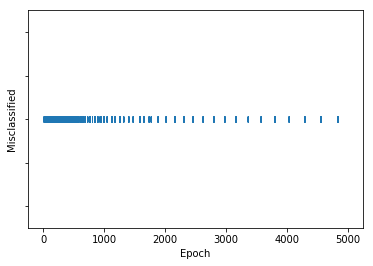

In [2]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    w[0]= 1.65150141
    w[1]= 3.24235768
    w[2]= 11.5047173
    w = np.zeros(len(X[0]))
    print("初始weight: ", w)
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 5000
    #store misclassifications so we can plot how they change over time
    errors = []
    print("errors: ", errors)

    #training part, gradient descent part
    for epoch in range(1,epochs+ 1):
        error = 0
        print("epoch: ", epoch)
        for i, x in enumerate(X): #i==> #of samples
            #misclassification
            print(X[i])
            print(w)
            
            print(Y[i]*np.dot(X[i], w))
                  
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                print(Y[i])
                print((X[i] * Y[i]))
                print("w: ", w)
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
                
        errors.append(error)
        print(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

w = svm_sgd_plot(X,y)
#they decrease over time! Our SVM is learning the optimal hyperplane

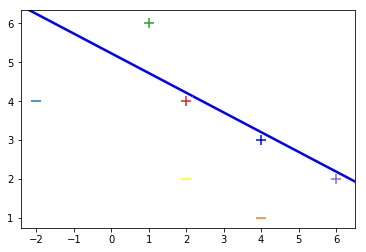

In [3]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')